# <center> 다각적 통계 분석을 통한 유망산업 발굴</center>
## <center>: 재정의된 '포스트 코로나'를 중심으로</center><br><br><br>
 #### Written by. Team 피너트리<br><br><br>

&nbsp; 코로나바이러스(COVID-19)의 출현 이후, 국민의 생활 및 산업이 크게 변화했습니다. 이에 다가올 포스트 코로나 시대에 대비해야 한다는 전문가들의 의견이 나오고 있습니다. 그러나, 현재까지는 포스트 코로나 시기가 어떻게, 어떤 방향으로 흘러가고 있는지, 또 우리가 서 있는 현주소는 어디쯤인지 불명확했다는 문제가 있었습니다.  <br><br>

&nbsp;&nbsp;본 조사에서는 재정의된 포스트 코로나 시기를 중심으로 국민의 생활 및 소비 패턴을 파악하고, 다가올 포스트 코로나 시대 소비 인사이트를 제공하여 유망 산업을 발굴하는 것을 목적으로 합니다. 이를 위해, 우선 코로나바이러스 관련 데이터들을 분석하여 실확진자 추이와 지역별, 나이대별, 성별 확진자를 시각화하고, 실확진자 추이를 유동인구 추이와 비교하여 나타내고자 합니다. 이를 통해 얻은 인사이트와 정부 정책 시행 시기 등을 고려하여 코로나19 발생 이후의 시기를  __'기-승-전-결'의 형태로 재정의__ 하고 현 시점의 위치를 명확히 하였습니다. 또한, 본론에서는 배달 호출 정보 데이터와 품목 별 소비지수 데이터, 업종 별 결제금액 데이터에 클러스터링과 요인분석(FA) 등 여러 기법들을 활용하여 소비 인사이트를 얻고 유망 산업을 제시하였습니다. 마지막으로, 결론에서는 본론에서 얻은 인사이트를 요약하고 한계 및 시사점을 제시하며 글을 맺도록 하겠습니다. <br><br>







<img src="http://scimonitors.com/wp-content/uploads/2020/03/banner.png"  align = "center" > 

__[목차]__

1. 서론
  1.  코로나19 사태 기본 분석
     - 지역별,나이대별, 성별 확진자 시각화 
     - 실확진자 추이 및 유동인구 추이 시각화
  2.  코로나 시기 재정의
     - 코로나 시기 시각화 및 정리
2. 본론
    1.  Delivery data로 유망 산업 살펴보기
    2.  Index data 로 유망 산업 살펴보기
       - Factor Analysis 시각화 
    3.  Card data로 유망 산업 살펴보기
       - Clustering(K-means) 시각화
       - 시계열 Factor Analysis 시각화
3. 결론
   1.  인사이트 정리
   2.  한계 및 시사점
   3.  맺으며

__[활용데이터 설명]__<br>
효과적인 분석을 위해 주어진 데이터를 최대한 많이 활용하려 했습니다. 활용한 데이터는 다음과 같습니다.
외부데이터 링크는 ppt에 첨부하였습니다. 

-유동인구 데이터(fpopl)<br>
-업종 별 결제금액 데이터(card)<br>
-배달 호출 정보 데이터(delivery)<br>
-품목 별 매출 성장 지수 데이터(index)<br>
-COVID-19 관련 데이터(Time,TimeProvince,Timeage,Timegender)<br>
-(외부데이터)아모레퍼시픽 산업보고서<br>
-(외부데이터)국토정보지리원 연속수치지형도 행정경계 데이터<br><br><br>



## 1.서론


####  필요한 패키지 호출 및 경로 설정

package를 부르기 위해 아래 코드를 실행해 주세요

In [ ]:

install.packages(c("rgdal","ggmap","sp","maptools","viridis","magrittr","scales","gridExtra","data.table",
                  "tidyverse","lubridate","factoextra","tfplot","tsfa","cluster","IRdisplay","foreign","extrafont",
                  "showtext","grid"))

In [ ]:
suppressPackageStartupMessages({ 
    library(rgdal,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(ggmap,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(sp,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(maptools,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(viridis,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(magrittr,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(scales,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(gridExtra,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(data.table, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tidyverse, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(lubridate, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(gridExtra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tfplot, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tsfa, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(cluster, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(IRdisplay, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(foreign,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(extrafont,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(showtext,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(grid,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
})



경로설정을 바꾸실 땐, 아래 setwd안에 경로를 바꿔주세요

In [50]:
setwd('C:/Users/samsung/Desktop/대학교/시각화공모전/KT_data_20200703')
getwd()

[1] "C:/Users/samsung/Desktop/대학교/시각화공모전/KT_data_20200703"

##  A. 코로나19 사태 기본 분석

### 지역별, 나이대별, 성별 확진자 시각화

### a. 지역별 확진자 시각화 해석


지역별 확진자의 비율을 파악해 보도록 하겠습니다.
먼저, 어떤 지역이 코로나 심각 지역인지 알아보기 위해 지역별 확진자의 수를 지도 위에 표시해 보도록 하겠습니다.<br><br>

In [ ]:
#행정구역 지도를 가져와 줍니다.
korea_map_shp = rgdal::readOGR("C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/지도/CTPRVN.shp")
korea_map = fortify(korea_map_shp)


korea_map %>% str()

#지역별 확진자 수를 지도에 표시하기 위해 확진자 수 데이터를 가져오고, 알맞게 전처리해 줍니다.

TimeProvince <-fread('C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/COVID_19/TimeProvince.csv',
                     stringsAsFactors=FALSE, 
                     encoding = "UTF-8")

TimeProvince$date <- as.Date(TimeProvince$date)
TimeProvince$date <- as.character(TimeProvince$date,'%m/%d')

TimeProvince$province=TimeProvince$province %>% as.factor()

confirm_added=TimeProvince %>%
  group_by(province)%>% 
  summarize(N=max(confirmed))

confirm_added$province=plyr::revalue(confirm_added$province,c("서울"="0","부산"="1","대구"="2",
                                                              "인천"="3","광주"="4","대전"="5",
                                                              "울산"="6","세종"="7","경기도"="8",
                                                              "강원도"="9","충청북도"="10","충청남도"="11",
                                                              "전라북도"="12","전라남도"="13","경상북도"="14",
                                                              "경상남도"="15","제주도"="16"))


colnames(confirm_added)<-c("id","confirmed")

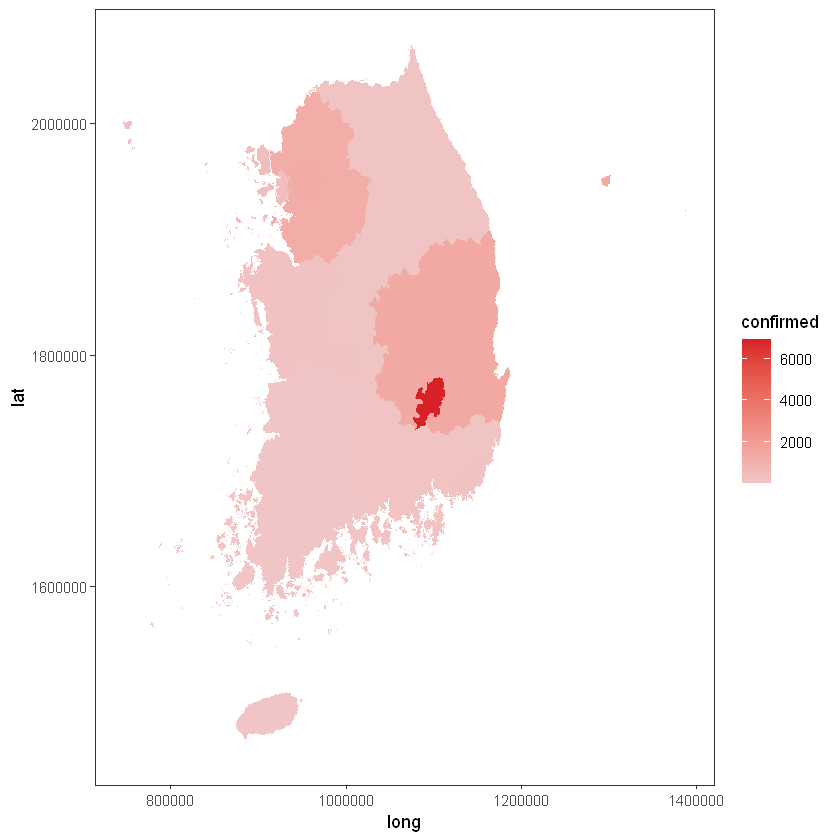

In [3]:
# 지도 데이터와 확진자 수 데이터를 해당하는 지역에 알맞게 병합하고, 지도에 나타내 줍니다.
korea_map=merge(korea_map,confirm_added, by="id")
mycorona=ggplot() + geom_polygon(data=korea_map, aes(x=long, y=lat, group=group, fill=confirmed))
mycorona+scale_fill_gradient(low = "#F1C5C5", high = "#D92027")+ 
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
        panel.grid.major.y = element_blank(), panel.grid.minor.y = element_blank(), 
        plot.title = element_text(face = "bold", size = 18, hjust = 0.5))

   - 각 지역별로 확진자 수를 넣고, 심각도에 따라 진한 색으로 나타내어 주었습니다. 
   - 서울, 경기, 경북, 그리고 대구가 코로나 19 확진자가 가장 많은 심각 지역인 것으로 보입니다.

 ### b. 나이대별,성별 확진자 시각화 해석

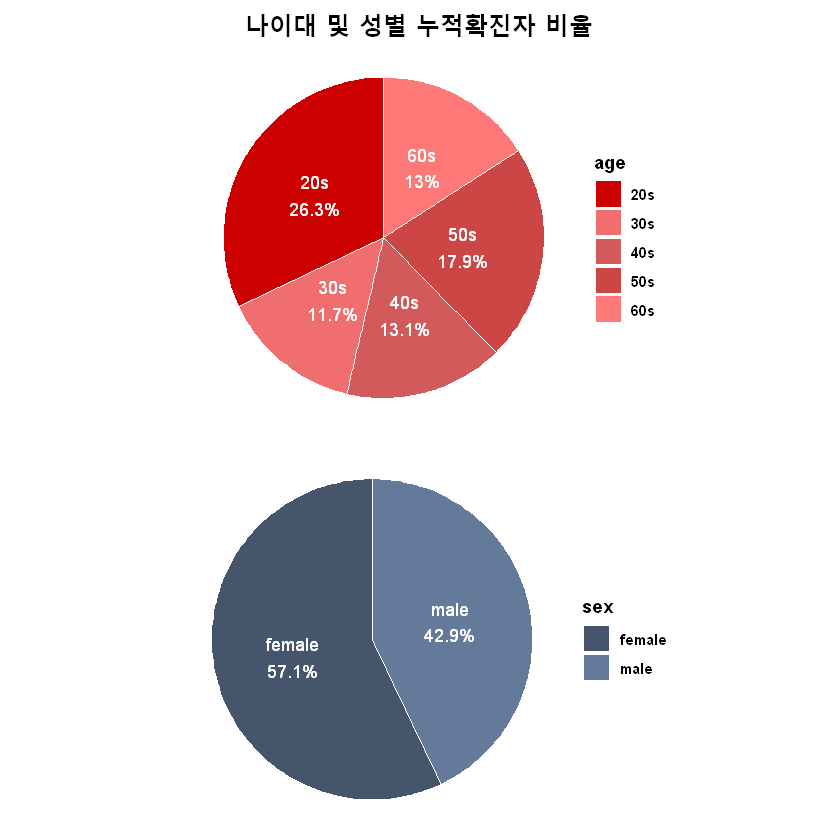

In [3]:
#전처리

age <- fread('COVID_19/TimeAge.csv',
             stringsAsFactors=FALSE,
             data.table=FALSE,
             encoding = "UTF-8")
age <- age[age$date == '2020-06-30',] 
age <- age[c(3:7),]
#plot_age

c <-ggplot(age, aes(x = "", y = confirmed, fill = age)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(age,"\n",round(confirmed/128,1),"%")), 
           position = position_stack(vjust = 0.5),color = "white") +
  scale_fill_manual(values = c("#CD0000","#F06E6E","#D25A5A","#CD4646","#FF7878","#F4A0A0","#FA8282")) +
  theme_void()   +
  theme(text =element_text(face = "bold"))

#plot_gender


gender <- fread('COVID_19/TimeGender.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")

gender <- gender[gender$date == '2020-06-30',]

d <-ggplot(gender, aes(x = "", y = confirmed, fill = sex)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(sex,"\n",round(confirmed/128,1),"%")), 
           position = position_stack(vjust = 0.5),color = "white") +
  scale_fill_manual(values = c("#45556b","#637a9a")) +
  theme_void() +theme(text =element_text(face = "bold"))

grid.arrange(c,d, nrow=2, top = textGrob("나이대 및 성별 누적확진자 비율",gp=gpar(fontsize=20,font=2)))  



 - 나이대별로는 20대, 50대가 가장 누적 확진자수가 가장 많고, 그 다음으로는 40, 60, 30 대 순으로 많았습니다. <br> (index데이터에 있는 나이대와 동일하게 20대에서 60대만 확인했보았습니다.)
 - 성별 확진자 시각화녀 확진자수 비율은 비슷하나, 여성이 좀 더 많음을 알 수 있습니다.

### 실확진자 추이 및 유동인구 추이 시각화

### a. 실확진자 추이 시각화

'data.frame':	163 obs. of  7 variables:
 $ date     : Date, format: "2020-01-20" "2020-01-21" ...
 $ time     : int  16 16 16 16 16 16 16 16 16 16 ...
 $ test     : int  1 1 4 22 27 27 51 61 116 187 ...
 $ negative : int  0 0 3 21 25 25 47 56 97 155 ...
 $ confirmed: int  1 1 1 1 2 2 3 4 4 4 ...
 $ released : int  0 0 0 0 0 0 0 0 0 0 ...
 $ deceased : int  0 0 0 0 0 0 0 0 0 0 ...


Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."Warning message:
"Use of `Time$c` is discouraged. Use `c` instead."Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."

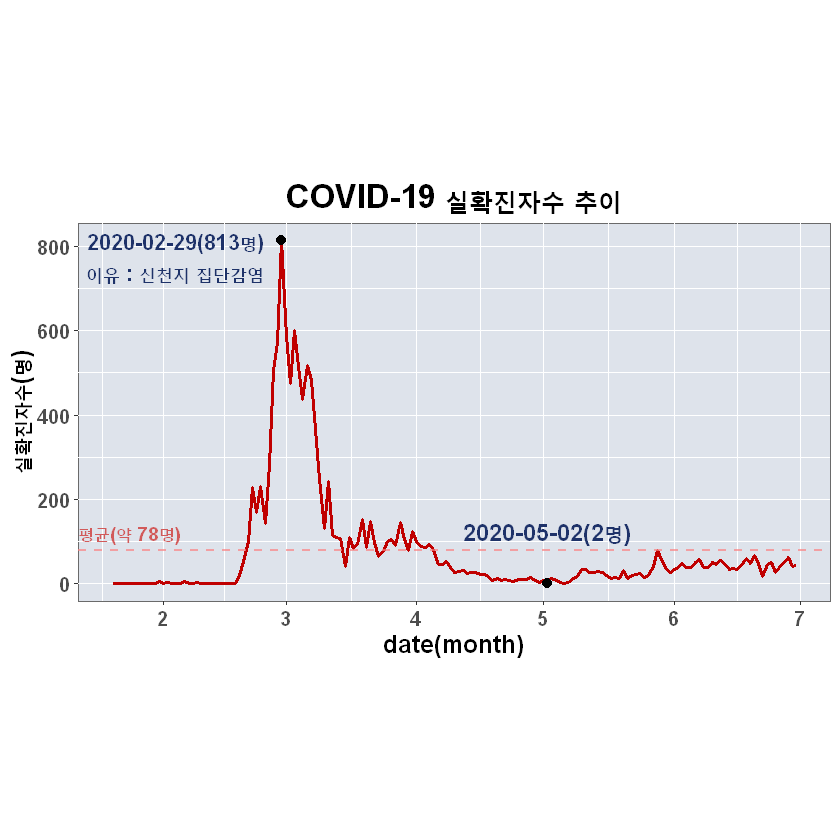

In [4]:
##### 전처리

Time <-fread('COVID_19/Time.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
Time$date <- as.Date(Time$date)
str(Time)

c <- c(rep(0,163))
c[1] <- 1
for (i in 2:length(Time$confirmed)){
  if (Time$confirmed[i] - Time$confirmed[i-1] > 0) {
    c[i] <- Time$confirmed[i] - Time$confirmed[i-1]
  }else{
    c[i] <- 0
  }
}

Time <- cbind(Time, c)
#plot 

ggplot(Time, aes(x =date, y = `c`)) + geom_line(color='#c00000', size = 0.9) + coord_fixed(ratio = 0.1) +
 theme(panel.background = element_rect(fill = "#dee3eb" , color = "#6a6a6a"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),panel.grid.major = element_line(color = "white"),
      plot.title = element_text(face = "bold",hjust = 0.5, size =20),text =element_text(face = "bold", size =15)) +
 ggtitle("COVID-19 실확진자수 추이") +  xlab("date(month)") + ylab("실확진자수(명)")+
 geom_point(mapping =aes(x =Time$date[which.max(Time$`c`)] ,y = 813 ), color="black", size =2.5)+ 
 annotate("text", x=Time$date[which.max(Time$`c`)], y=813,fontface=2,label="\n2020-02-29(813명)\n이유 : 신천지 집단감염",hjust = 1.1, size = 4.6 , color = "#1E3269") +
 geom_point(mapping =aes(x =Time$date[104] ,y = 2 ), color="black", size =2.5) +
 annotate("text", x=Time$date[104], y=2, label="2020-05-02(2명)\n\n\n", size = 5 ,fontface=2, color = "#1E3269") +
 geom_hline(yintercept=78.53, linetype='dashed', color='#FA8282', size=0.7,alpha = 0.7)+
 annotate("text", x=Time$date[5], y=120, label="평균(약 78명)", size = 4 , fontface=2, color = "#D25A5A")

- 이를 통해 2020년 2월 29일에 신천지 코로나 확산으로 인해 가장 실확진자 수가 많았고, 5월 2일에 가장 적었음을 알 수 있습니다.
- 줄어가는 추세이긴 하지만 종종 특정 사건들로 인해 확진자수가 늘어나기도 하는 상황임을 알 수 있습니다. 

### b. 유동인구 추이 시각화

다음으로는 유동인구 데이터(fpopl)를 이용하여, 주별 유동인구 평균 데이터를 만들어 주별 실확진자 수 추이와 비교해보았습니다.

In [5]:
#전처리
#1. fpopl data 를 주별 유동인구 평균 데이터로 전처리
fpopl <-fread('fpopl.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
fpopl %<>% select(base_ymd,adstrd_code,popltn_cascnt)
code <-fread('adstrd_master.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
code %<>% select(adstrd_code,signgu_nm)

doraga <- left_join(fpopl,code,by="adstrd_code")
doraga %<>% select(-adstrd_code)
doraga$base_ymd <- as.character(doraga$base_ymd)
doraga$base_ymd <- as.Date(doraga$base_ymd,"%Y%m%d")
doraga$base_ymd <- week(doraga$base_ymd)


week <- c(1:24)
fpopl_mean <- c(rep(0,24))
df <- data.frame(week,fpopl_mean)


for (i in 1:24){
  a <- doraga %>% filter(base_ymd == i) %>% summarise(n=mean(popltn_cascnt))
  df$fpopl_mean[i] <- a$n
}

`summarise()` ungrouping output (override with `.groups` argument)


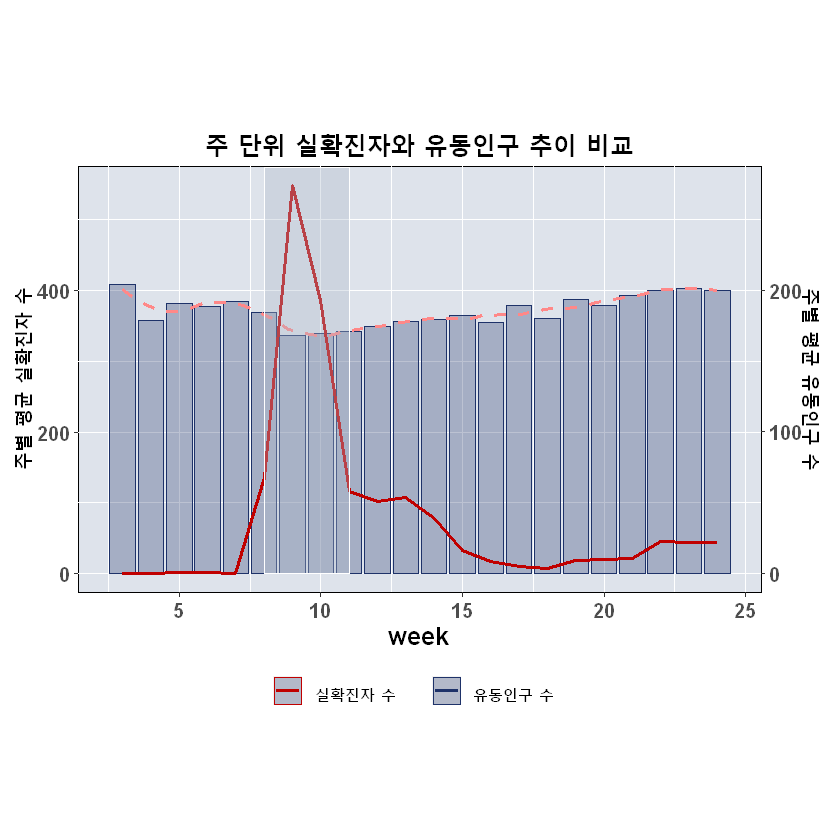

In [6]:
#2. 전처리한 유동인구 데이터와 실확진자 수 비교를 위해time 데이터와 병합

Time$date <- week(Time$date)
Time %<>% group_by(date) %>% summarize(c_mean= mean(c)) %>% unique()
colnames(Time) <- c("week","c_mean")

time_fpopl <- plyr::join(Time, df, by = "week")
time_fpopl <- time_fpopl[time_fpopl$week <= 24,] 

#plot 
period <-data.frame(시기 = c("2"),start =c(8), end=c(11))
ggplot() +
  geom_bar(data=time_fpopl, aes(x = week, y = fpopl_mean*2 ,color = "유동인구 수") ,fill = '#1E3269',alpha= 0.3,stat ="identity", position="dodge")+ 
  ylab("명") +geom_smooth(data=time_fpopl, aes(x = week, y = fpopl_mean*2),method = 'loess', formula ='y ~ x',span = 0.3, color = "#ff8888",size = 0.9,se =F, linetype= "dashed")+
  geom_line(data=time_fpopl, aes(x = week, y = c_mean, color = "실확진자 수"),size =0.9)+
  scale_colour_manual("", values=c("실확진자 수" = "#c00000", "유동인구 수" = "#1E3269"))  + coord_fixed(ratio = 0.025) +
  theme(panel.background = element_rect(fill = "#dee3eb" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),legend.position="bottom", plot.title = element_text(face = "bold",hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5, size =15)) +
  ggtitle("주 단위 실확진자와 유동인구 추이 비교")+
  scale_y_continuous(
    
    # Features of the first axis
    name = "주별 평균 실확진자 수",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2, name="주별 평균 유동인구 수")
  )+
 geom_rect(data=period, aes(NULL,NULL,xmin=start,xmax=end),fill="#adb9ca",
            ymin=0,ymax=573, colour="white", size=0.5, alpha=0.35)

- 실확진자 수가 가장 많았던 시기에(신천지로 인한 확산)에 유동인구가 줄었고, 그 이후에는 유동인구가 점점 증가하였습니다. 
- 따라서 대중의 오프라인 활동과 코로나 확진자 수는 상관관계가 있으며,확진자가 상대적으로 감소한 현재는 다소 경각심이 해이해진 경향을 보인다고 해석할 수 있습니다.   

## B. 코로나 시기 재정의_ 코로나 시기 시각화 및 정리

&nbsp;&nbsp;지금까지 우리는 코로나 관련 정책과 확진자 수에 따른 유동인구 추이를 살펴보았습니다. 이를 고려하여, 코로나바이러스가 우리나라에 상륙한 이후 1월부터 6월까지의 시기를 __'기-승-전-결'__ 의 형태로 분할해 보았습니다. 코로나바이러스가 출현한 직후인 1월부터 '신천지' 사태로 확진자 수가 급증하고 감염병 위기경보 단계가 '심각'단계로 격상되기 직전까지의 단계를 '기'로, 이후 확진자수가 급증하고 마스트 품귀 현상이 일어난 시기를 '승'으로, 마스크 5부제가 시작되고 유동인구가 풀리기 시작한 단계를 전-1로, 코로나 19사태 발발 이후 확진자 수가 최저에 다다른 이후의 시기를 '전-2'로 정의하였습니다.<br><br> 
&nbsp;&nbsp;또한, 본 조사에서는 유동인구가 풀리기 시작한 __'전'이후부터의 시기를 포스트 코로나로 간주__ 합니다. 코로나19가 절정을 맞았던 '승'시기까지는 대중들의 경각심이 특히 높았고, 유동인구 역시 감소할 수밖에 없었던 특수한 상황이기 때문에, 해당 시기가 끝나기 전까지의 소비 패턴은 앞으로 다가올 포스트 코로나 시기의 일반적인 트렌드가 될 것이라고 볼 수 없기 때문입니다. 우리는 이처럼 새롭게 정의된 시기를 기준으로 국민들의 생활/소비 패턴과 산업 별 매출 추이를 파악하고 비교함으로써 효과적으로 포스트 코로나 의 모습을 예측하고자 합니다. <br>

&nbsp;&nbsp;아래 표와 이미지를 통해 시기를 구분한 기준 및 이유를 요약하겠습니다.


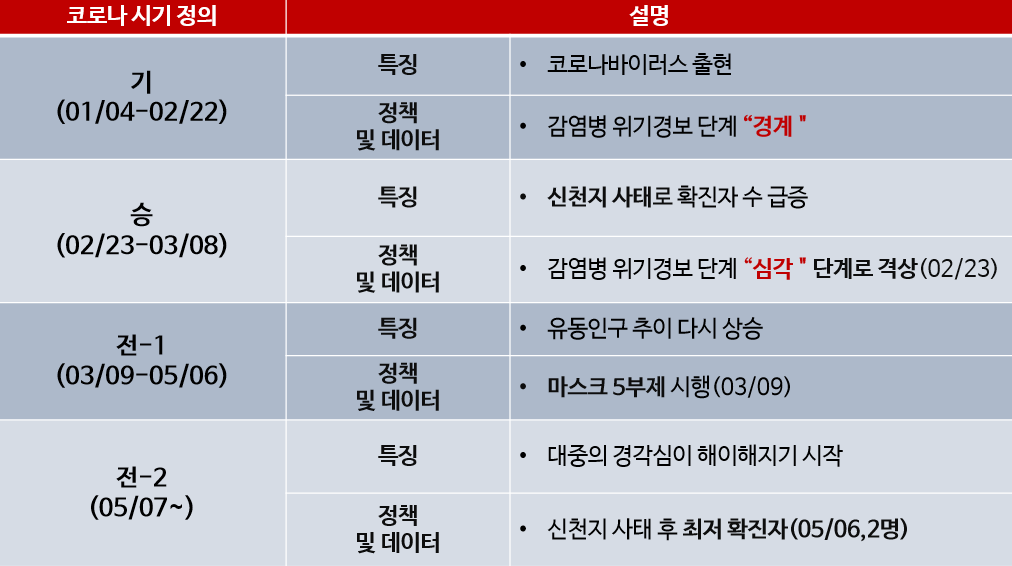

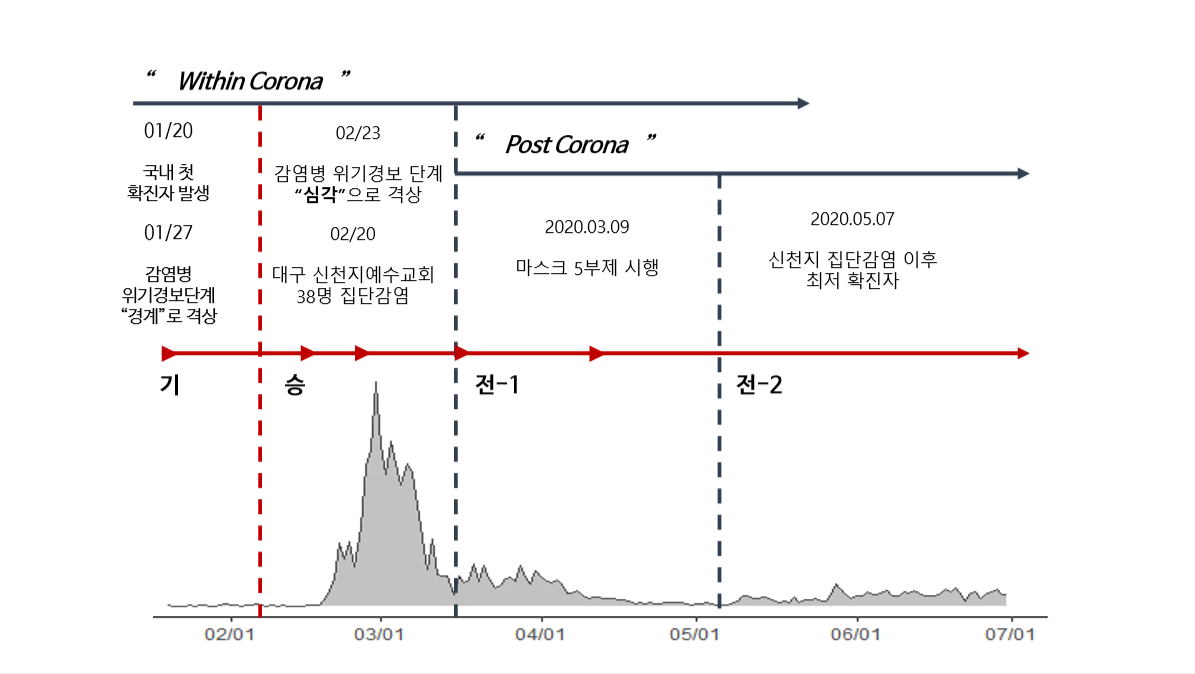

In [7]:
display_png(file="period2.png")
display_png(file="period.png")

## 2.본론
##  A. Delivery data로 유망 산업 살펴보기

첫째로, 배달 호출 정보 데이터(delivery)를 이용해 유망 산업을 살펴보겠습니다.<br> 우선 필요한 데이터를 호출하고, 전처리를 진행해 봅시다.

In [ ]:
########################
### Delivery 전처리 ###
#######################
delivery <- fread('delivery.csv', 
                  header = T, 
                  stringsAsFactors = F, 
                  data.table = F, 
                  encoding = 'UTF-8'
                  )

code = delivery %>% select(ends_with('code')) %>% colnames()
id = c('SERIAL_NUMBER', colnames(select(delivery, ends_with('ID'))))

delivery = delivery %>% select(-c(code, id))
delivery = delivery %>% separate(PROCESS_DT, sep = '-', into = c('year', 'month', 'day'), remove = FALSE)

rm(list = c('code', 'id'))

### a. 일자별 평균 배달 건수 및 매출 추이

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


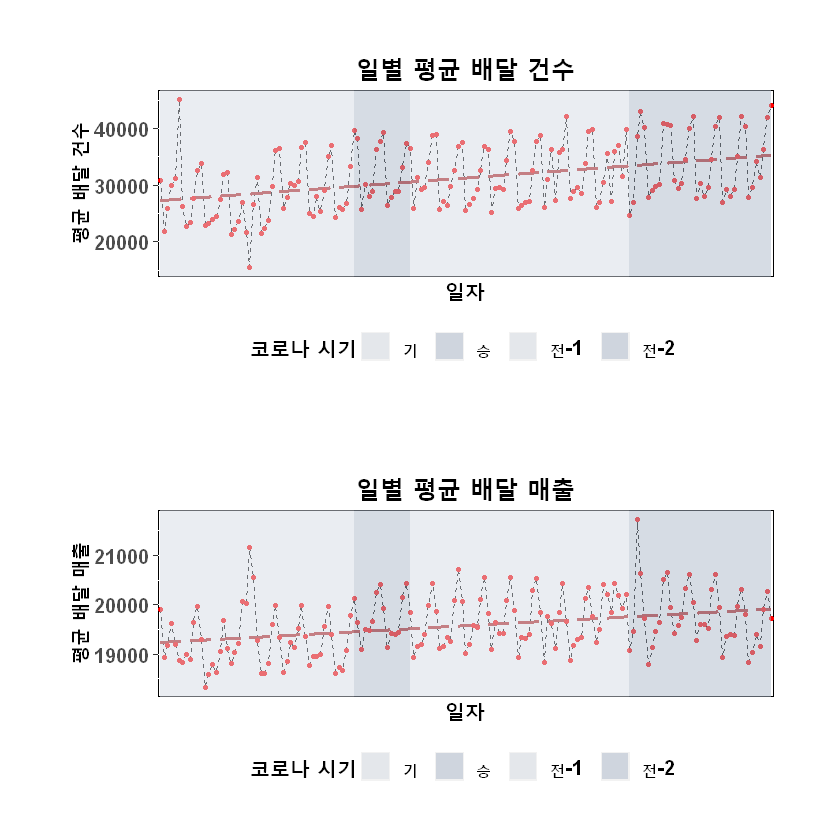

In [9]:
index <- data.frame('period' = c('기', '승', '전-1', '전-2'),
                    'start' = c('2020-01-01', '2020-02-22', '2020-03-08', '2020-05-06'),
                    'end' = c('2020-02-22', '2020-03-08', '2020-05-06', '2020-06-21'))


p1 <- delivery %>% group_by(PROCESS_DT) %>% 
  summarize(N = n()) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = N, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 47000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 건수', title = '일별 평균 배달 건수', fill = '코로나 시기') +
  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery %>% filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(PROCESS_DT) %>% 
  summarize(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = MEAN, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 45224, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 매출', title = '일별 평균 배달 매출', fill = '코로나 시기') +
  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))
grid.arrange(p1, p2, ncol = 1)

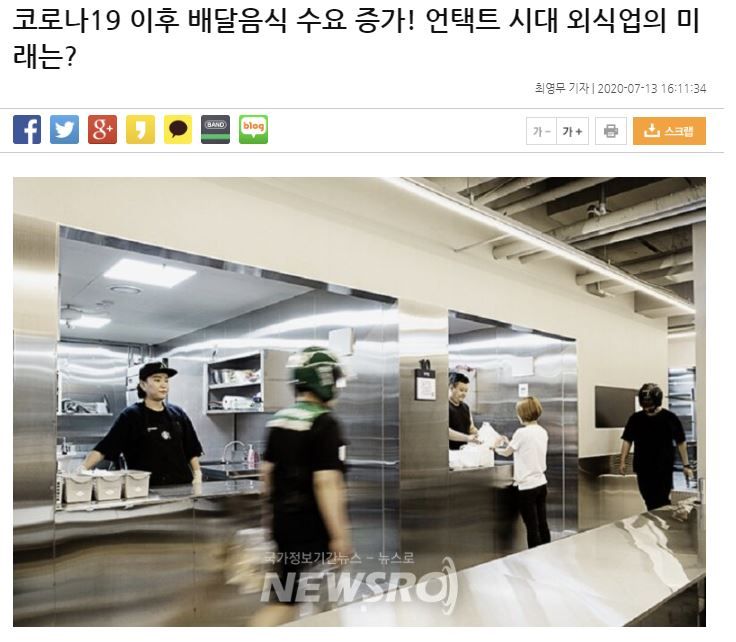

In [10]:
display_png(file="delivery_increase.JPG")  

- 일자별로 평균 배달 건수와 평균 배달 매출은 7일을 주기로 계절성을 띄는 것을 확인 할 수 있습니다.
- 시계열 추세선을 보면 일자별 배달 건수 및 매출이 꾸준히 증가하고 있음을 확인 할 수 있습니다.
- __코로나가 시작됨으로써 "Untact" 트랜드가 활성화 됨으로써 전체적으로 배달 건수와 매출이 증가하는 것으로 볼 수 있습니다.__

 ### b. 코로나 심각 지역(서울, 경기도, 대구, 경상북도)와 그 외 지역 배달 건수 비교

`summarise()` regrouping output by 'PROCESS_DT' (override with `.groups` argument)


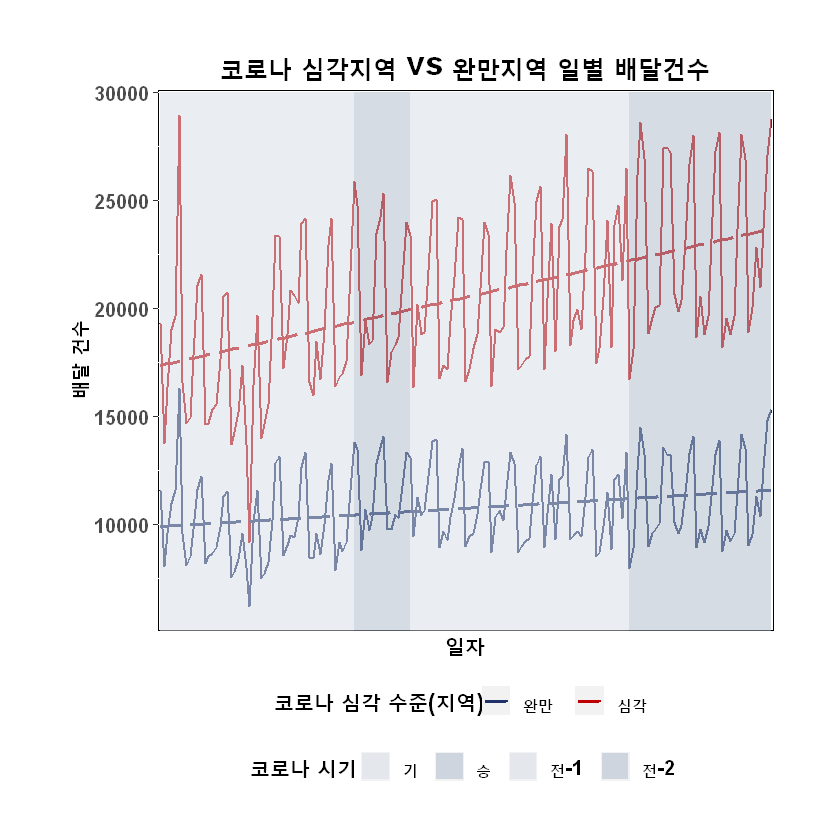

In [11]:
delivery$bad = ifelse(delivery$DLVR_STORE_SIDO %in% c('경기도', '경상북도', '대구광역시', '서울'), 1, 0)

delivery %>% 
  group_by(PROCESS_DT, bad) %>% 
  summarize(N = n()) %>% 
  ungroup() %>%
  ggplot(aes(x = PROCESS_DT, y = N)) + 
  geom_line(aes(group = as.factor(bad), color = as.factor(bad)), size = 0.6) +
  geom_smooth(aes(group = as.factor(bad), color = as.factor(bad)), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 30000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  scale_linetype_discrete('코로나 심각 수준(지역)', labels = c('완만', '심각'), aes(Color = as.factor(bad))) +
  scale_color_manual(labels = c('완만', '심각'),values=c( "#1E3269","#c00000")) +
  scale_x_discrete(breaks = NULL) +
  labs(x = '일자', color = '코로나 심각 수준(지역)', y = '배달 건수', fill = '코로나 시기') +
  ggtitle('코로나 심각지역 vs 완만지역 일별 배달건수') +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

- __코로나 심각지역(서울, 경기도, 경상북도, 대구)__ 의 경우 __배달 건수 증가 추세__ 가 더 가파르다는 것을 확인 할 수 있습니다.
- __코로나 완만지역(그 외 지역)__ 의 경우 코로나 심각지역만큼은 아니지만 어느 정도 증가 추세를 확인 할 수 있습니다.
- _계절성 제거를 위해 월별로 나누어서 다시 확인해 보겠습니다._

### c. 배달 품목별  건수를 통한 유망 품목 확인

`summarise()` regrouping output by 'month' (override with `.groups` argument)
`summarise()` regrouping output by 'month' (override with `.groups` argument)


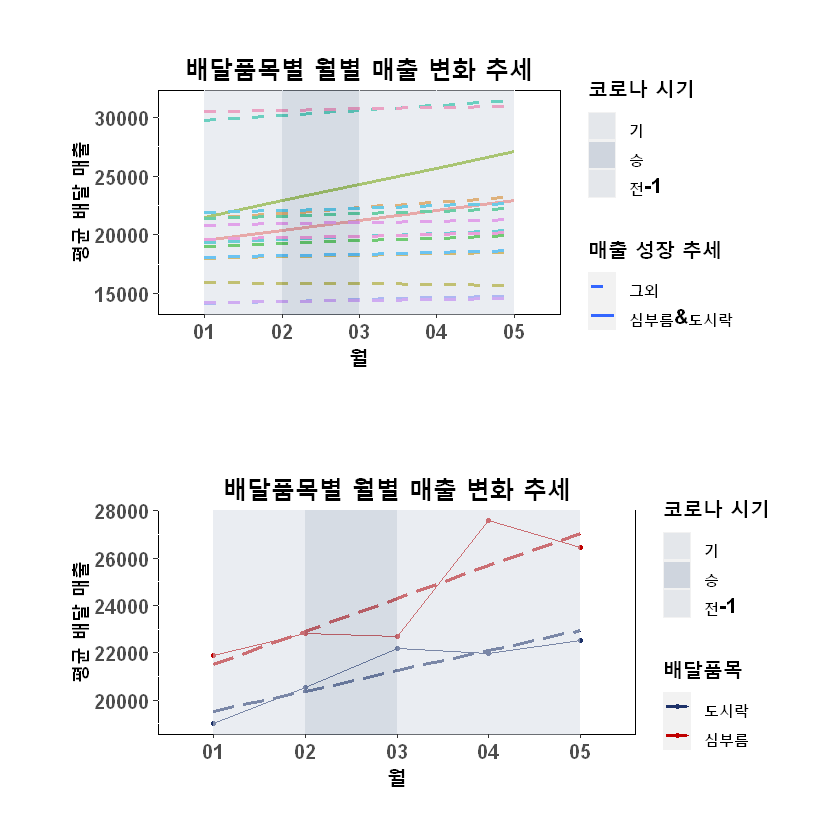

In [12]:
month_index <- data.frame('period' = c('기', '승', '전-1'),
                          'start' = c('01', '02', '03'),
                          'end' = c('02', '03', '05'))

p1 <- delivery  %>% 
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>%
  filter(month != "06") %>% 
  mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0)) %>%  
  ggplot(aes(x = month, y = MEAN)) +
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, 
                  color= DLVR_STORE_INDUTY_NM, 
                  linetype = as.factor(NEW_cate), 
                  size = as.factor(NEW_cate)), method = 'lm', se = FALSE, formula = y~x) +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_linetype_manual(values=c("dashed", "solid"),labels = c('그외', '심부름&도시락'))+
  scale_size_manual(values = c(1, 1.1), guide = 'none') +
  guides(color = FALSE) +
  labs(x = '월', y = '평균 배달 매출', linetype = '매출 성장 추세', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery  %>%
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>%
  filter(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락')) %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM)) +
  geom_point(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM) ,size = 1) + 
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 30000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(values=c( "#1E3269","#c00000")) +
  labs(x = '월', y = '평균 배달 매출', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))



grid.arrange(p1, p2, ncol = 1)

- _6월달의 경우 6월 21일까지 밖에 없어 제외하고 추세 확인_
- __심부름&도시락__ 품목이 다른 품목들에 비해 __두드러지게 배달 건수가 증가하는 것__ 을 확인 할 수 있습니다.
- __도시락__ 같은 경우 __기~승__ 단계에 __급격히 증가하는 추세__ 를 확인 할 수 있습니다.
- __심부름__ 같은 경우 __전-1__ 단계에서 __급격히 증가하는 추세__ 를 확인 할 수 있습니다.
- __심부름&도시락__ 과 다른 품목들의 배달 매출과 증가율을 확인해 보겠습니다.

### d. 도시락,심부름 vs 그외품목 : 월별 건수&매출 변화 및 추세

In [13]:
delivery = delivery %>% filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0))

`summarise()` regrouping output by 'month' (override with `.groups` argument)
`summarise()` regrouping output by 'month' (override with `.groups` argument)


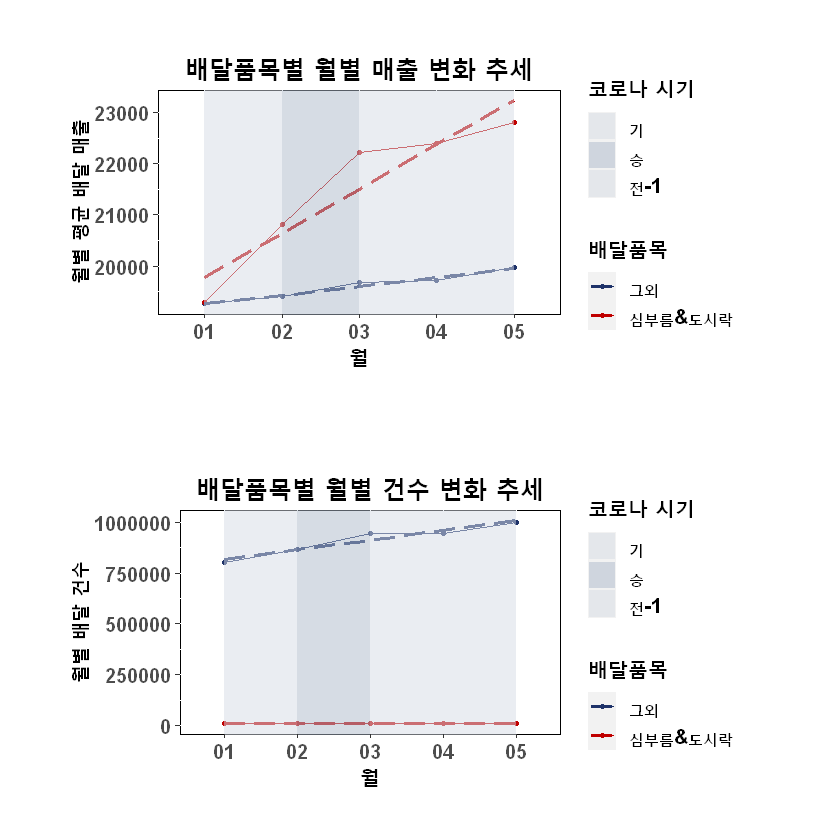

In [14]:
p1 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 평균 배달 매출', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = -1000000, ymax = 1200000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 건수 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

grid.arrange(p1, p2, ncol = 1)

 ### e. 도시락,심부름  : 월별 건수 변화 및 추세

`summarise()` regrouping output by 'month' (override with `.groups` argument)


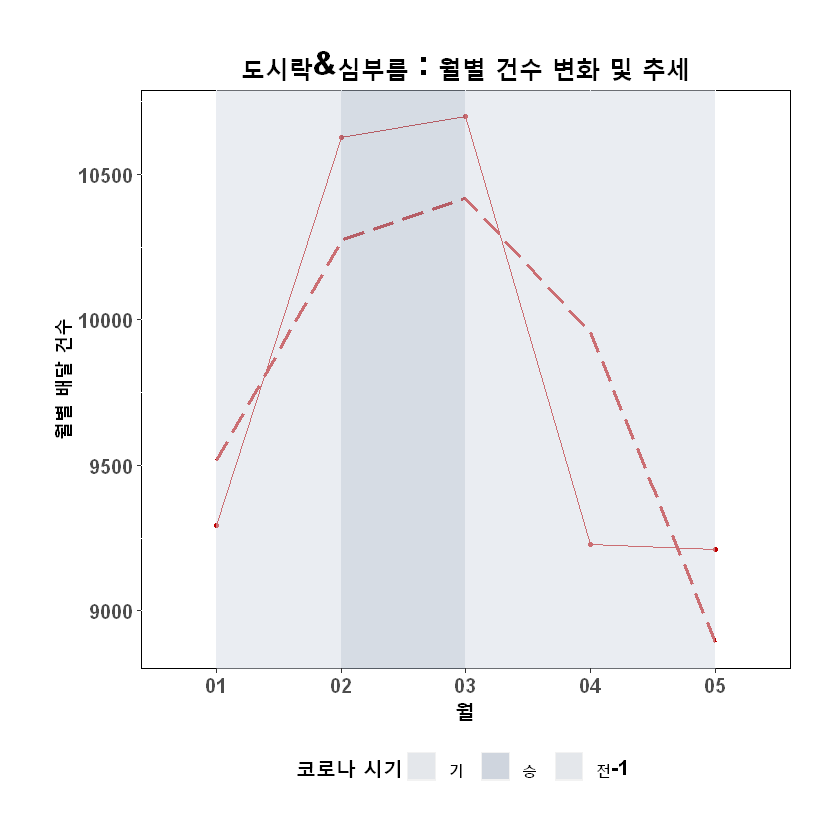

In [15]:
delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>%
  filter(NEW_cate == 1) %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(group = 1, color = "#c00000") +
  geom_point(group = 1, color = "#c00000", size = 1) +
  geom_smooth(aes(group = 1), 
              color = "#c00000", method = 'lm', se = FALSE, formula = y ~ x + I(x^2), linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 15000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  labs(x = '월', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('도시락&심부름 : 월별 건수 변화 및 추세') +
  theme(legend.position = 'bottom') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,30,30,30))

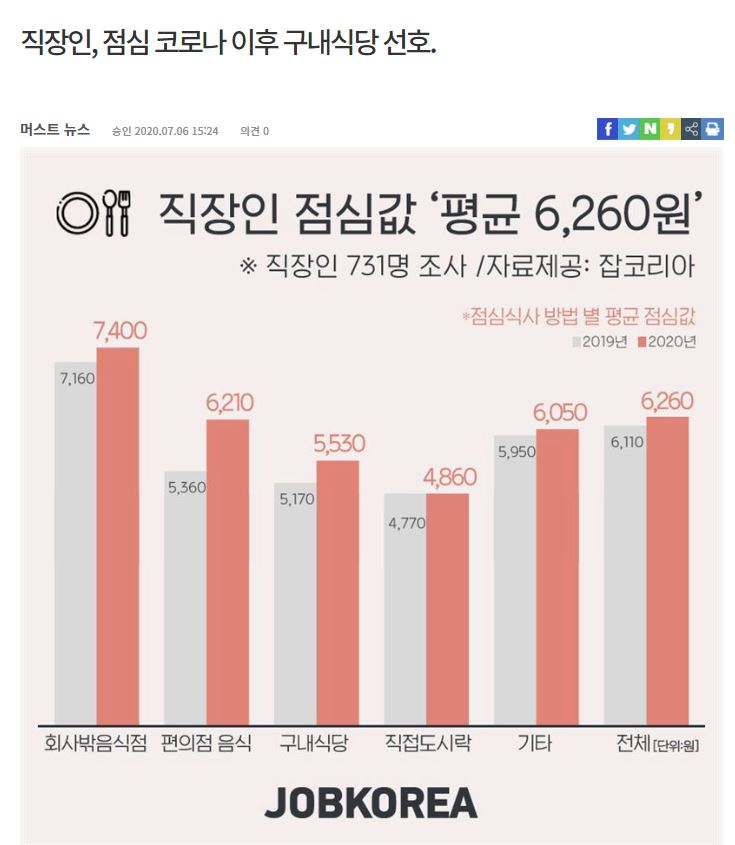

In [16]:
display_png(file="delivery_2.JPG")  

- _6월달의 경우 6월 21일까지 밖에 없어 제외하고 확인_
- __심부름&도시락__ 품목이 다른 품목들에 비해 __확연하게 배달 매출이 증가한 것__ 을 확인 할 수 있습니다.
- 코로나로 인해 직장인들이 밖에서가 아닌 __회사 내부에서 점심을 해결하는 경향이 증가__ 해서 __도시락&배달 심부름__ 이 증가한 것이 아닌가 유추할 수 있습니다
- 흥미로운 점은 __심부름&도시락__ 품목의 월별 배달 건수는 __오목 함수(Concave) 형태라는 것 입니다.__ 
- 이는 직장이들이 __한번에 대량으로 점심 식사를 주문__ 해서 그런 것 아닌가 하고 유추할 수 있습니다.
- 결론적으로 __직장인들의 대량적인 점심식사 소비__ 가 __심부름&도시락 매출 증가__ 에 큰 영향을 끼쳤다고 유추 할 수 있습니다.

### f. 코로나 심각에 따른 심부름&도시락 vs 그외품목 매출 비교

`summarise()` regrouping output by 'month', 'NEW_cate' (override with `.groups` argument)


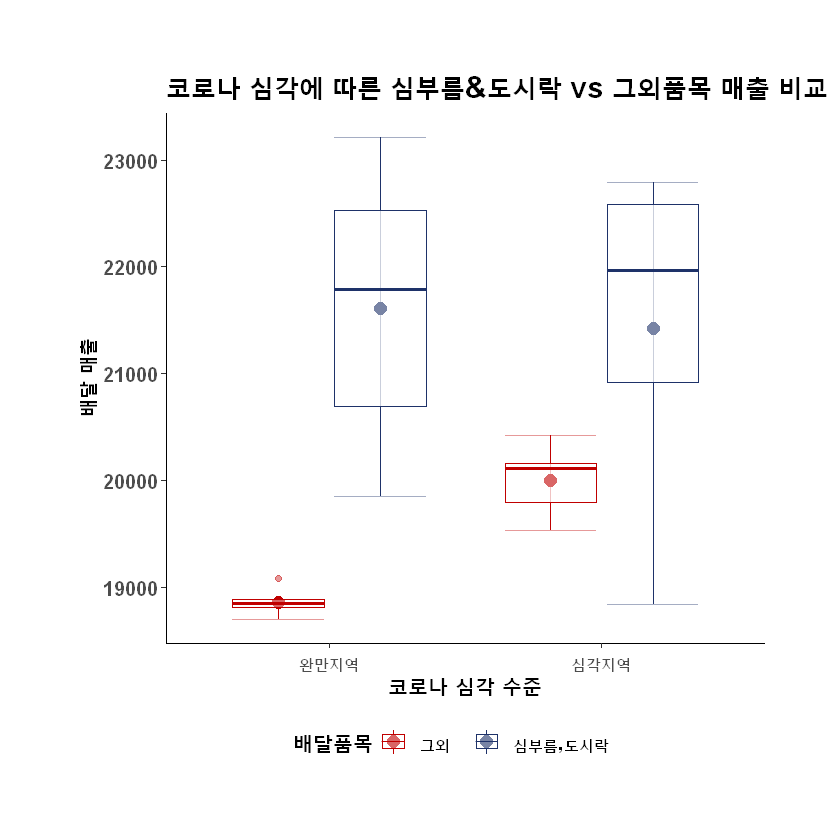

In [17]:
delivery %>% group_by(month, NEW_cate, bad) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != '06') %>% 
  ggplot(aes(y = MEAN, x = as.factor(bad), color = as.factor(NEW_cate))) + 
  stat_boxplot(alpha = 0.4, geom = 'errorbar') +
  stat_summary(aes(fill = as.factor(NEW_cate)), fun = mean, size= 5, geom="point", shape=20,
               position = position_dodge(width = .75)) +
  geom_boxplot(alpha = 0.4) +
  scale_color_manual(labels = c('그외', '심부름,도시락'), values=c("#c00000", "#1E3269")) +
  scale_fill_discrete(guide = 'none') +
  scale_x_discrete(labels = c('완만지역', '심각지역')) +
  labs(x = '코로나 심각 수준', color = '배달품목', y = '배달 매출') +
  ggtitle('코로나 심각에 따른 심부름&도시락 vs 그외품목 매출 비교') +
  theme_classic() +
  theme(legend.position = "bottom",
        title = element_text(size = 15, face = 'bold'),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(45,45,45,45))

- __코로나 심각 수준과 배달품목간의 연관성__ 확인을 위해 __Box-plot__ 으로 확인해 보았습니다.
- __도시락&배달 심부름__ 에 경우 __코로나 심각 수준에 상관없이__ 매출이 __그외 품목보다 높은 것__ 을 확인 할 수 있습니다. 
- 반면에, __그외 품목__ 에 경우 __코로나 심각지역이 매출이 높은 것__ 을 확인 할 수 있습니다.
- 또한, __코로나 심각 수준에 상관없이__ __도시락&배달 심부름 매출이 높다__ 는 것을 확인 할 수 있습니다.
- 결론적으로, __본인의 거주지가 코로나가 심각한지 아닌지에 상관없이 도시락&배달 심부름을 많이 이용한다__ 고 볼 수 있습니다.
- 저희는 앞으로 __지역보다는 품목에 초점을 맞추기로 결정__ 했습니다.

##  B. Index data로 유망 산업 살펴보기

&nbsp;&nbsp;다음으로, 품목별 소비지수 데이터(Index)의 나이대(20,30,40,50,60, 모든 나이대) 와 성별(여자, 남자, 모든 성별)을 묶어 총 18가지의 타겟을 만들고, 타겟 별로 index의 17가지 품목들의  3-5월 cgi의 변화율을 통해 소비 패턴을 보고자 했습니다.3-5월 변화율을 보는 이유는, __'승'__ 에 해당하는 3월에서 __'전'__ 에 해당하는 5월의 변화율을 통해 포스트 코로나 시기의 유망 산업을 예측하기 위해서입니다.<br> 
&nbsp;&nbsp; 이를 위해 Factor analysis를 사용했는데, 이 분석기법에 대한 설명은 아래 링크로 대신하겠습니다.  <br>
[factor analysis 참조]:(https://rfriend.tistory.com/62) 

In [18]:
#전처리
index <- fread('index.csv', data.table = FALSE, encoding = 'UTF-8')

index %<>% group_by(period,catm,age,gender) %>% mutate(cgi_mean = mean(cgi)) %>% select(period,catm,age,gender,cgi_mean) %>% ungroup() %>% unique()

index <- index[index$period ==  202003 | index$period == 202005,]

a <- c(rep(0,594))

month03 <- filter(index,index$period == 202003)

month05 <- filter(index,index$period == 202005)

change <- plyr::join(month03, month05, by = c("catm","age","gender"))

colnames(change) <- c("period","catm","age","gender","mean1","period2","mean2")
change %<>% mutate(change = (mean2-mean1)/mean1) %>% na.omit() %>% select(catm,age,gender,change,period2)


change%<>% spread(key='catm', value='change') %>% select(-period2)

change

age,gender,가공식품,건강관리용품,기호식품,담배,바디/헤어용품,뷰티소품,빙과류,빵류,생활용품,신선식품,애완동물용품,유제품류,음료,제과류,주류,화장품
20,all,-0.2316841,0.016826397,-0.1889213,-0.06221495,-0.107613476,-0.12941869,-0.10105152,-0.2097176,-0.091085715,-0.18593819,-0.11782080,-0.18463490,-0.021895467,-0.27516866,-0.0627554992,-0.220630136
20,F,-0.2456256,0.041530067,-0.1884121,-0.06989544,-0.079760146,-0.09359911,-0.12647124,-0.2550143,-0.150253481,-0.19671237,-0.06654687,-0.21179663,-0.039790300,-0.28535737,-0.0692921998,-0.075014701
20,M,-0.1853320,0.005716926,-0.1618639,-0.05317896,-0.095461792,-0.04812171,-0.04588769,-0.1262142,0.100936203,-0.17486634,-0.27642697,-0.08357210,0.024395482,-0.24232801,-0.0615255789,-0.465055927
30,all,-0.2203805,-0.007998865,-0.1938060,-0.05562005,-0.001186867,-0.22203395,-0.10812355,-0.2188768,-0.061136575,-0.18900568,-0.04051205,-0.18521338,0.319776471,-0.13395292,-0.1104431463,0.198959941
30,F,-0.2153747,0.024791878,-0.1801236,-0.05664355,-0.037447065,-0.20481001,-0.11631645,-0.2289154,-0.087024302,-0.18660996,-0.07568834,-0.18665825,0.501137015,-0.19572540,-0.1068206617,0.220681314
30,M,-0.2285409,-0.036160788,-0.2288126,-0.05157633,-0.126142883,-0.21779843,-0.08458331,-0.2083181,-0.002662533,-0.19230817,0.16666143,-0.17699383,0.080304160,-0.01461076,-0.1163617388,0.126935438
40,all,-0.1830026,0.091384223,-0.2601712,-0.09450994,-0.118325728,-0.24730751,-0.05044160,-0.2379172,-0.131765040,-0.15725958,-0.04069939,-0.18301088,0.013681302,-0.18070570,-0.0868379955,0.006967523
40,F,-0.1827169,0.121953795,-0.2049970,-0.10131912,-0.098590435,-0.21454655,-0.04333046,-0.2470979,-0.095732702,-0.16045336,-0.02872726,-0.19075487,0.018366688,-0.21890187,-0.0836413351,0.160383643
40,M,-0.1821159,-0.027697218,-0.3320951,-0.08301637,-0.124680410,-0.17761290,-0.06920051,-0.2227611,-0.184016810,-0.14729546,-0.10070850,-0.16478168,-0.001319842,-0.09971091,-0.0923138524,-0.236135975
50,all,-0.1959132,0.124492910,-0.2664849,-0.04317568,-0.083321221,-0.13789469,0.08222903,-0.2124431,-0.165043030,-0.15237279,-0.19710461,-0.14943119,0.060996788,-0.15391334,-0.0513204707,-0.057106702


Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

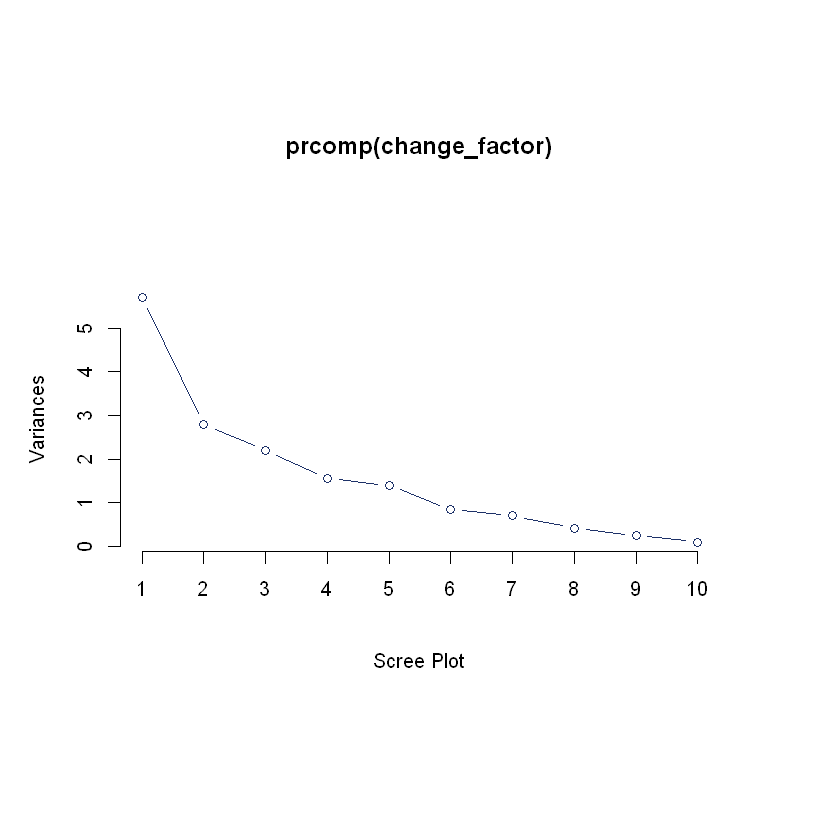

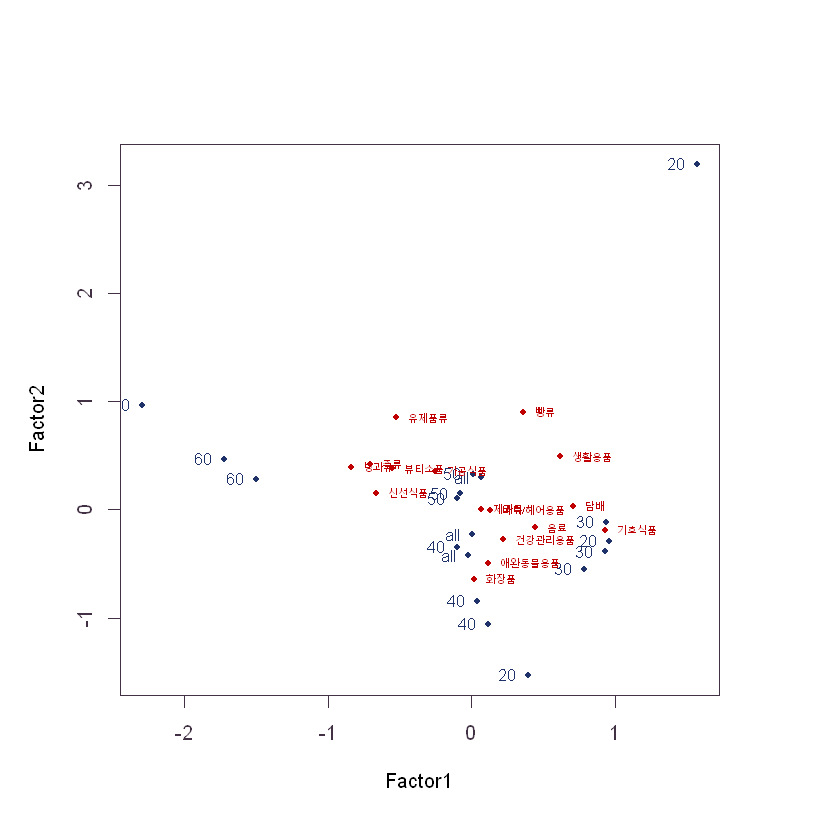

In [19]:
#scaling 하기
change_factor = change %>% select(-age,-gender) %>% na.omit
change_factor = scale(change_factor) %>% na.omit %>% as.tibble()
#scree plot을 통해 factor 수 정하기
par(mar = c(12,5,12,5))
plot(prcomp(change_factor),type="l",sub = 'Scree Plot' , col = "#1E3269")

#시각화

change_fa <- factanal(change_factor,factors=2,rotation = "varimax",scores = "regression")
par(mar = c(6,5,6,5))
plot(change_fa$scores, col = "#1E3269",pch = 20, fg = "#423144",col.axis ='#423144')
text(change_fa$scores[,1], change_fa$scores[,2], labels = change$age, cex = 0.8, pos = 2, col = "#1E3269")
points(change_fa$loadings, pch= 20, col = "#c00000")
text(change_fa$loadings[,1], change_fa$loadings[,2],labels = rownames(change_fa$loadings), cex = 0.5, pos = 4, col = "#c00000")


Scree plot 그래프가 급격히 떨어지는 지점과 열 수 (17)를 고려하여 factor 수를 2개로 보겠습니다. 
- factor1과 factor2가 명확히 구분되지는 않지만, 그 중 factor1은 __'건강관리용품, 애완동물용품, 화장품, 담배, 기호식품'__ 등 생활에 필요한 물품들이고, factor2는 __'유제품류, 신선식품,주류,빙과류'__ 등 식품군이 밀집되어 있다고 볼 수 있습니다. <br><br>
- 또한 __화장품, 애완동물용품, 건강관리용품__ 의 3-5월 변화율이 같이 묶였고, 그에 해당하는 주 타겟이 __40대__ 임을 확인할 수 있습니다. 즉,  화장품, 애완동물용품, 건강관리용품과 40대의 cgi 변화율이 비슷하다고 볼 수 있습니다. 따라서 이들의 변화율이 상승세라면, 40대에게 이 품목을 타겟팅했을 때 유망산업으로 발전할 수 있다는 가능성이 있다고 볼 수 있습니다. <br><br>
- 다음으로, 이 세 품목의 추이를 확인해보겠습니다. 

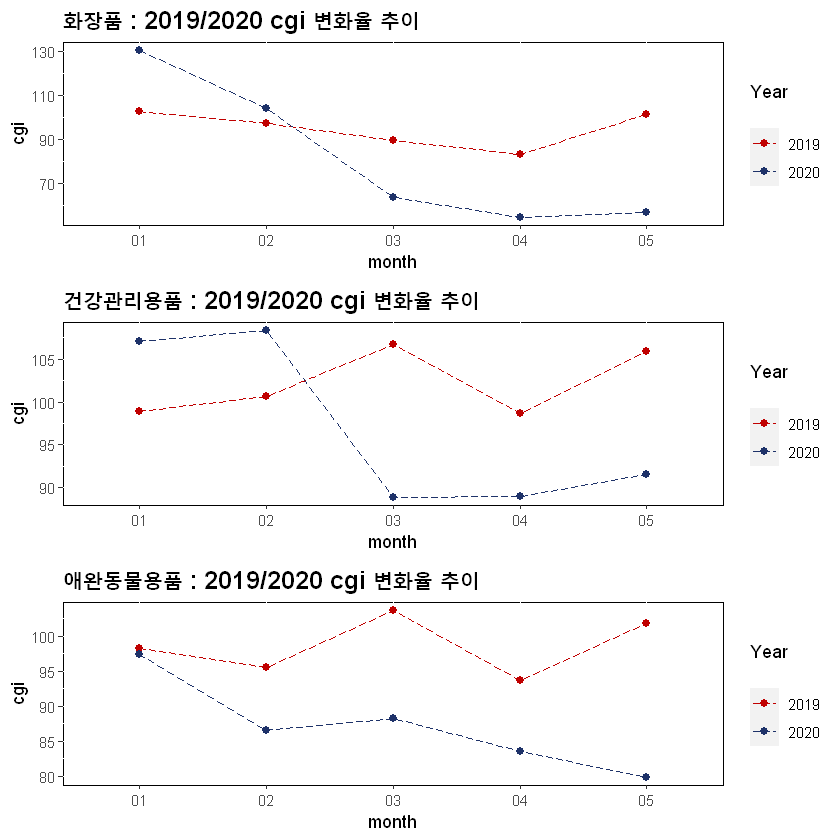

In [20]:
index <- fread('index.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
index %<>% mutate(year = ifelse(period>202000,2020,2019))
index %<>% group_by(period,catm) %>% mutate(n=mean(cgi)) %>% filter(period < 201906 | period >= 202001 )
index %<>% select(period, catm, n, year) %>% unique()


index %<>% mutate(month = substr(as.character(period),5,6)) 
a <- index %>% filter(catm == "화장품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
  ggtitle("화장품 : 2019/2020 cgi 변화율 추이") +  scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +geom_point(size=2)+
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))

b <- index %>% filter(catm == "건강관리용품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
   ggtitle("건강관리용품 : 2019/2020 cgi 변화율 추이") +geom_point(size=2)+
   scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))


c <- index %>% filter(catm == "애완동물용품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
  ggtitle("애완동물용품 : 2019/2020 cgi 변화율 추이") + geom_point(size=2)+
  scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))

grid.arrange(a,b,c)

- __화장품과 건강관리용품__ 이 상대적으로 다른 품목들에 비해 매출이 호전되고 있음을 볼 수 있습니다. 따라서 이 둘을 40대로 타겟팅 했을 때 유망가능성이 있습니다. <br><br>
- 다음으로, 특히 화장품 관련해서 솔루션을 구체화해보겠습니다. 화장품 산업보고서를 통해 솔루션을 제시하겠습니다. 데이터셋은 국내 3대 화장품 기업 중하나인 아모레퍼시픽의 사업보고 데이터로, 분기의 온라인, 오프라인, 면세점 매장 매출 비율 추이를 시각화 하였습니다.


In [21]:
cosmetic <- fread('Amore Pacific.csv', data.table = FALSE, encoding = 'UTF-8')
cosmetic <- cosmetic[c(3,26,27,28),c(1,2,3,4,6,7,8,9,10)]

cosmetic

,V1,V2,V3,V4,V6,V7,V8,V9,V10
3,(단위: 1억원),1Q18,2Q18,3Q18,1Q19,2Q19,3Q19,4Q19,1Q20
26,% (오프라인),46.2%,46.7%,40.9%,40.1%,38.2%,29.7%,20.4%,27.4%
27,% (온라인),12.9%,13.2%,11.5%,13.4%,15.5%,14.2%,19.8%,30.7%
28,% (면세점),40.9%,40.1%,47.5%,46.5%,46.2%,56.1%,59.8%,41.8%


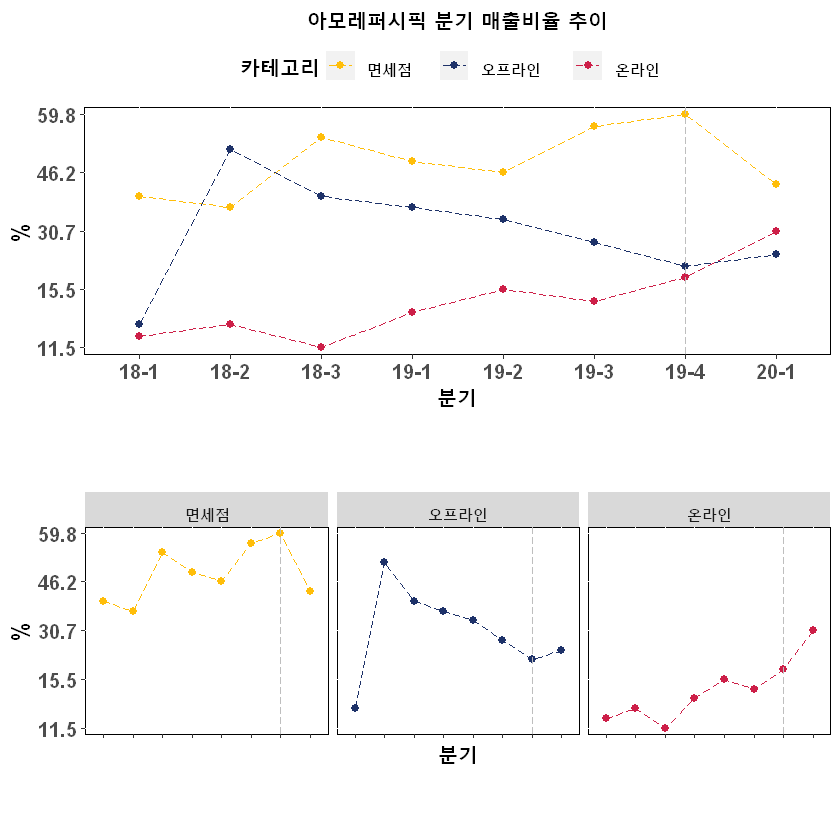

In [22]:
카테고리 <- c("오프라인","오프라인","오프라인","오프라인","오프라인","오프라인","오프라인","오프라인",
      "온라인","온라인","온라인","온라인","온라인","온라인","온라인","온라인",
      "면세점","면세점","면세점","면세점","면세점","면세점","면세점","면세점")
비율<- c(13.2,46.7,40.9,40.1,38.2,29.7,20.4,27.4,
       12.9,13.2,11.5,13.4,15.5,14.2,19.8,30.7,
       40.9,40.1,47.5,46.5,46.2,56.1,59.8,41.8)
분기 <- c("18-1","18-2","18-3","19-1","19-2","19-3","19-4","20-1","18-1","18-2","18-3","19-1","19-2","19-3","19-4","20-1","18-1","18-2","18-3","19-1","19-2","19-3","19-4","20-1")

cosmetic<- data.frame(cbind(카테고리,비율,분기))

a<- ggplot(cosmetic, aes(x=분기, y = 비율, group = 카테고리,color = 카테고리))+
  geom_line(size = 0.5, linetype="longdash") +
  scale_color_manual(values=c('#FFBE0A','#1E3269','#CD1F48'))+ 
  ggtitle("아모레퍼시픽 분기 매출비율 추이") +
  ylab("%") + geom_point(size=2)+ scale_y_discrete(breaks = c(11.5,15.5,30.7,46.2,59.8))+
  theme(legend.position="top", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0.5,size =15),
       text = element_text(face = "bold",hjust = 0.5,size =15)) +
  geom_vline(xintercept="19-4",linetype= "longdash", color='grey', size=0.4)
 

b<-  ggplot(cosmetic, aes(x=분기, y = 비율, group = 카테고리,color = 카테고리)) +geom_line(size = 0.5, linetype="longdash") +
  scale_color_manual(values=c('#FFBE0A','#1E3269','#CD1F48'))+
  ylab("%") + geom_point(size=2)+
  coord_fixed(ratio = 0.33) + scale_y_discrete(breaks = c(11.5,15.5,30.7,46.2,59.8))+
  theme(legend.position="", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15),
       text = element_text(face = "bold",hjust = 0.5,size =15)) + facet_wrap(~카테고리, ncol=3)+
  theme(axis.text.x=element_blank())+
  geom_vline(xintercept="19-4",linetype= "longdash", color='grey', size=0.4)
 

grid.arrange(a,b, ncol=1)


이를 통해 알 수 있는 사실은, <br><br> 
&nbsp;첫째, 화장품산업이 '승'단계(2월-3월)에서 매출 감소한 요인이 __면세점 매출 비율의 하락__ 이라는 점입니다. 국내 화장품 브랜드의 비율 중 중국인의 면세점 구입 비중이 컸는데, 코로나로 인한 입국금지 정책으로 인하여 줄어든 것입니다. 이제 입국금지가 풀렸으므로, 다시 면세점 매출로 인한 화장품 브랜드의 매출 증가가 예상됩니다. <br><br>
&nbsp;둘째, 오프라인 매장의 감소와 온라인매장의 증가입니다. 따라서 __온라인 매장__ 을 적극 활용한다면, 화장품 산업이 더욱 더 매출 증가할 것입니다. 

##  C. Card data로 유망 산업 살펴보기_Clustering 시각화

 ### a. 전처리 및 EDA

In [23]:
card <- fread('card.csv',
              header = T, 
              stringsAsFactors = F,
              data.table = F,
              encoding = 'UTF-8')

## 한글 없애기 ##
data <- card %>% filter(! (selng_cascnt %in% grep('[ㄱ-힣]',unique(card$selng_cascnt), value = T)),
                        ! (salamt %in% grep('[ㄱ-힣]',unique(card$salamt), value = T))) %>% 
  mutate(selng_cascnt = as.numeric(selng_cascnt),
         salamt = as.numeric(salamt)) %>%
  select(- c(adstrd_code, mrhst_induty_cl_code))

rm(list = c('card'))

data$receipt_dttm=data$receipt_dttm %>% as.character() %>% as.Date('%Y%m%d')

## 음수 값 확인 - 양수만 넣기## 
data$selng_cascnt %>% summary()
data$salamt %>% summary()

data = data %>% filter(selng_cascnt > 0, salamt > 0) %>% 
  mutate(receipt_dttm = ymd(receipt_dttm),
         week = week(receipt_dttm))

data %>% glimpse()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1892       2       9     213      47 5729589 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.937e+09  1.150e+05  4.721e+05  8.662e+06  1.818e+06  5.422e+11 

Rows: 3,685,535
Columns: 6
$ receipt_dttm       <date> 2020-01-04, 2020-01-04, 2020-01-04, 2020-01-04,...
$ adstrd_nm          <chr> "성내3동", "성내3동", "성내3동", "성내3동", "성내3동", "성내3동", ...
$ mrhst_induty_cl_nm <chr> "약국", "치과의원", "한의원", "의원", "자동차정비", "기타 교육", "보습...
$ selng_cascnt       <dbl> 463, 33, 53, 339, 19, 54, 12, 58, 13, 919, 1249,...
$ salamt             <dbl> 5843230, 7835550, 4589800, 9267240, 4441000, 144...
$ week               <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...


해당 카드 데이터의 판매 금액과 판매량 열에 음수 값이 있는 것을 확인했습니다.<br>카드 결제건수와 결제 금액보다 취소건수와 취소 금액이 더 많은 품목임을 암시합니다.<br>이는 포스트 코로나 시대의 유망 산업을 발굴하려는 본 조사의 목적과 맞지 않습니다. 따라서  0보다 큰 값을 갖는 행만을 선택해 주었습니다.

In [24]:
#코로나 시기를 새로운 period변수로 나타내 줍니다.
index1 = which(data$receipt_dttm == '2020-02-22') %>% max() #기 
index2 = which(data$receipt_dttm == '2020-03-08') %>% max() #승
index3 = which(data$receipt_dttm == '2020-05-06') %>% max() #전-1
index4 = nrow(data) #전-2

data_period = data 
data_period$period = c(rep(1, index1),
                       rep(2, index2 - index1),
                       rep(3, index3 - index2),
                       rep(4, index4 - index3))

receipt_dttm          adstrd_nm mrhst_induty_cl_nm       selng_cascnt 
                 0                  0                  0                  0 
            salamt               week             period 
                 0                  0                  0

`summarise()` ungrouping output (override with `.groups` argument)


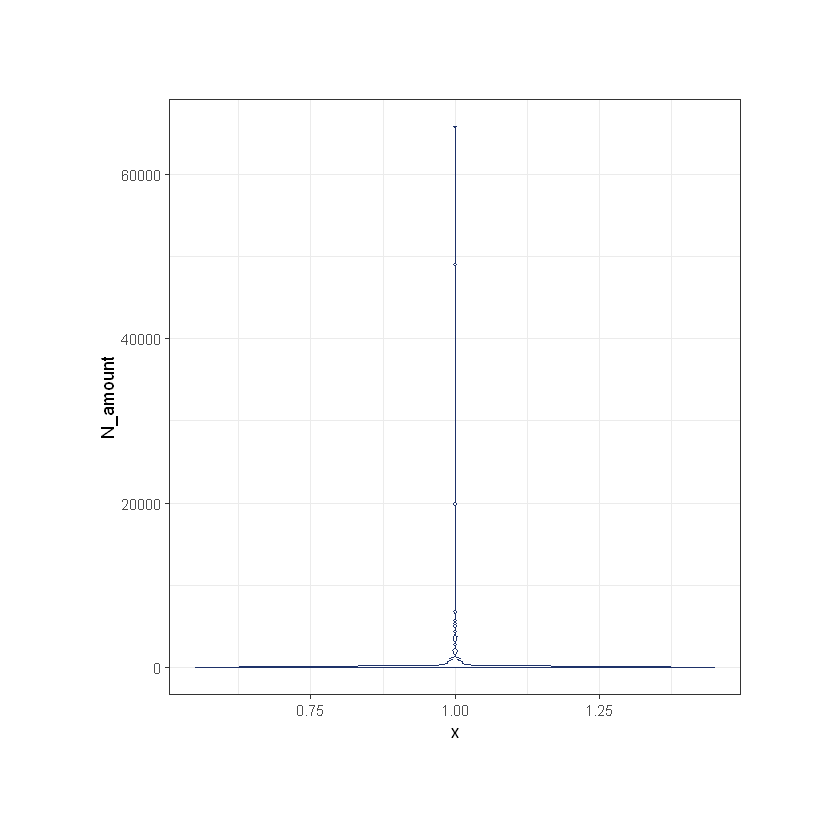

In [25]:
##이상치 및 결측치 처리##

data_period %>% is.na() %>% colSums()

mean_amount=data_period %>%
  group_by(mrhst_induty_cl_nm) %>% 
  summarise(N_amount=mean(selng_cascnt)) %>% 
  arrange(N_amount)

mean_amount %>%
  ggplot(aes(x=1, y=N_amount))+
  geom_violin( color = "#1E3269",size=0.3)+theme_bw() +theme(plot.margin = margin(60,60,60,60)) 

 데이터에 NA값이 없는 것을 확인했습니다. 각 범주 별로 전체 기간을 대상으로 한 평균 판매량의 분포를 violinplot으로 확인해 보았습니다. 데이터가 아래쪽으로 많이 쏠려 있는 것을 볼 수 있습니다. 평균 판매량이 적은 품목의 경우 유망 품목이라고 보기 어렵습니다. 따라서 평균 판매량의 상위 75%에 해당하는 범주들을 필터링하여 k-means 클러스터링을 진행해 보겠습니다.<br><br> k-means방법은 이상치의 영향을 다른 클러스터링 기법보다 크게 받게 됩니다. 앞서 평균 판매량이 하위 25%인 이상치 카테고리를 제거하고, 상위 25%의 데이터는 그대로 두었습니다. 이는 특정 범주가 포스트 코로나 시대의 유망 산업 품목일 경우 판매량이 상위권일 가능성이 높고, 이를 발굴하는 것을 본 조사의 목적으로 하기 때문입니다. 따라서 이상치의 영향을 극대화하여 유망 산업을 좀더 효율적으로 발굴하기 위해 k-means 기법을 사용하였습니다.

In [26]:
categories_new=mean_amount %>%
  filter(N_amount>=quantile(mean_amount$N_amount)[2]) %>% 
  arrange(desc(N_amount)) %>% select(mrhst_induty_cl_nm)%>% 
  ungroup()

categories_new <- as.data.frame(categories_new)


data_period <- data_period %>% 
  filter(mrhst_induty_cl_nm%in%
           as.matrix(categories_new,nrow = 1))

 ### b. K-MEANS clustering

__(1) 시기별 평균 판매량, 평균 매출, 평균 판매 가격을 이용한 클러스터링__

__(1)-1 필요한 데이터 생성 및 scaling__

In [ ]:
data_amount_period <- data_period %>% 
  group_by(period, mrhst_induty_cl_nm) %>% 
  summarise(mean_amount = mean(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(period, value = mean_amount)

data_selling_period <- data_period %>% 
  group_by(period, mrhst_induty_cl_nm) %>% 
  summarise(mean_selling = mean(salamt)) %>% 
  ungroup() %>% 
  spread(period, value = mean_selling)

data_price_period <- data_period %>%
  group_by(period,mrhst_induty_cl_nm) %>% 
  summarize(once_price=sum(salamt)/sum(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(period,value = once_price)

colnames(data_amount_period)[-1] = c('amount_1', 'amount_2', 'amount_3', 'amount_4')
colnames(data_selling_period)[-1] = c('selling_1', 'selling_2', 'selling_3', 'selling_4')
colnames(data_price_period)[-1] = c('price_1','price_2','price_3','price_4')

In [ ]:
data_clust = data_period %>% group_by(mrhst_induty_cl_nm) %>% 
  summarise(MEAN_SELLING = mean(salamt),
            MEAN_AMOUNT = mean(selng_cascnt),
            once_price = sum(salamt)/sum(selng_cascnt)
            ) %>%
  ungroup %>% 
  left_join(data_amount_period) %>% 
  left_join(data_selling_period) %>% 
  left_join(data_price_period)

#클러스터링하려면 numeric 변수만 필요합니다. 각 카테고리의 이름을 제거해 줍니다.
clust1 = data_clust %>%
  select(-c(mrhst_induty_cl_nm))

clust_scaled = scale(clust1) %>% as_tibble()

클러스터링에 필요한 data_clust와 clust1을 만들어 주었습니다.<br>단위에 따라서 클러스터링 결과가 달라질 수 있으므로 scale() 함수를 이용하여 스케일링해줍니다. 

__(1)-2 적절한 k값 찾기__

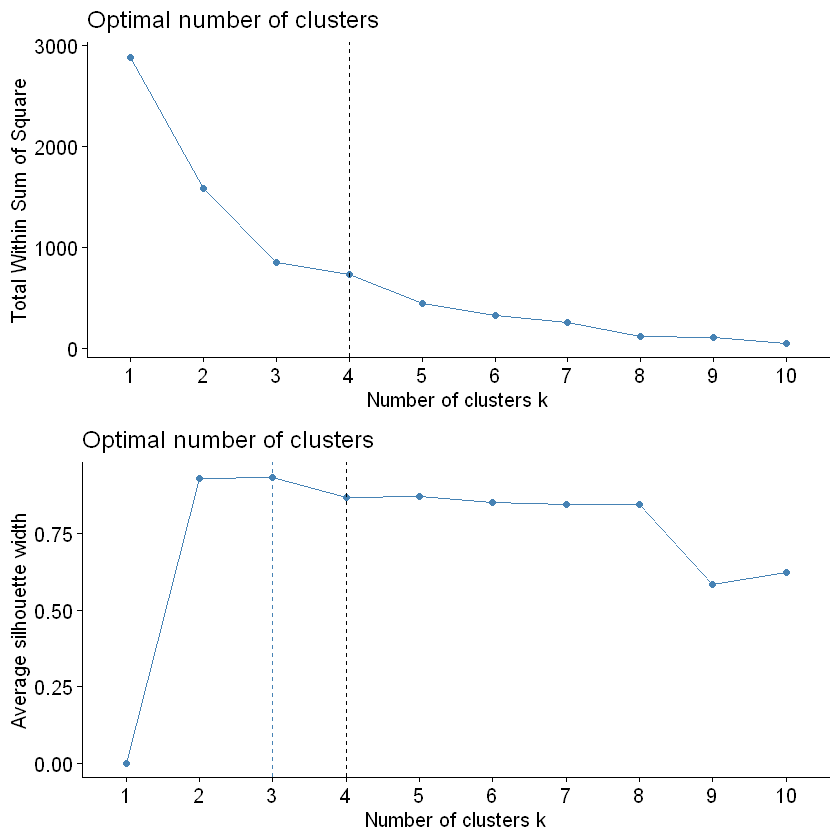

In [29]:
set.seed("19990107")
kmeans1 <- kmeans(clust_scaled, nstart = 10, iter.max = 15, centers = 4)
a<-fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method='wss') + 
  geom_vline(xintercept = 4, linetype = 2)

b<-fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method = "silhouette") +
  geom_vline(xintercept = 4, linetype = 2)
grid.arrange(a,b)

elbow 값과 siluette 값 모두를 고려하여 군집 개수를 4로 설정하였습니다. 클러스터링한 데이터에 각 군집의 번호를 할당하여 새로운 변수를 만들어 줍니다.<br>4개의 각 클러스터를 시각화해 보면 다음과 같습니다.

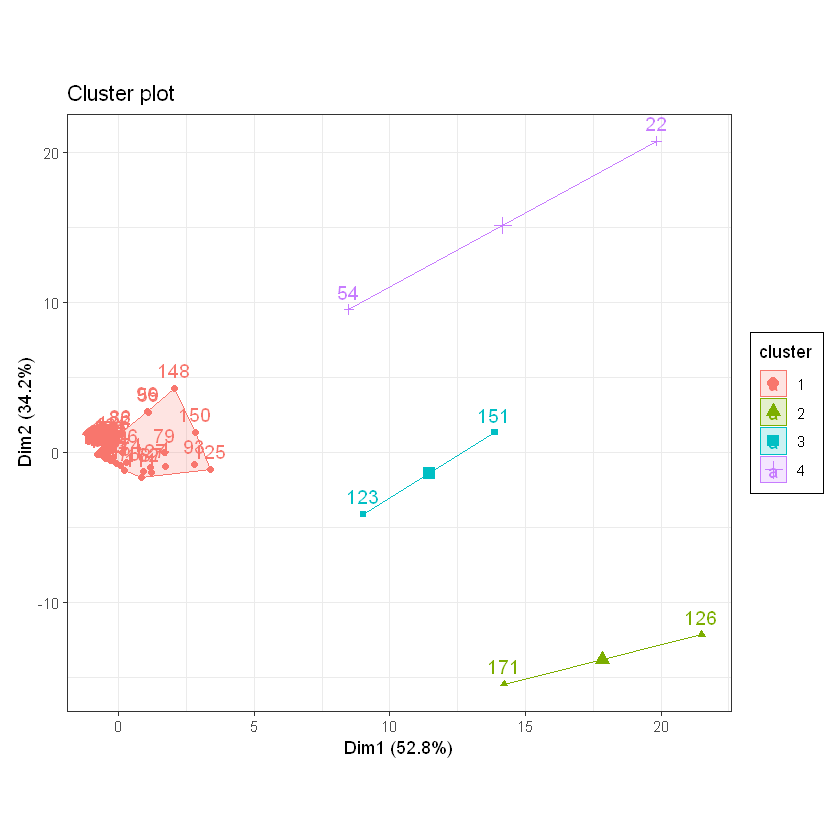

In [30]:
data_clust$cluster = kmeans1$cluster

fviz_cluster(kmeans1, clust_scaled)+ theme_bw()+theme(
    legend.background = element_rect(color = 'black', 
                                            size = 0.5),plot.margin=margin(50,10,50,10))

이제 각 클러스터의 품목들이 어떠한 특성을 갖고 있는지 알아보고, 본 조사에서 정의한 포스트 코로나 시기에 따른 소비 패턴을 분석해 봅니다. 이를 시각화하기 위한 데이터를 만들어 보고, 각 항목별로 클러스터들의 시기별 추이를 시각화해 보았습니다.

Joining, by = "mrhst_induty_cl_nm"
`summarise()` regrouping output by 'period' (override with `.groups` argument)


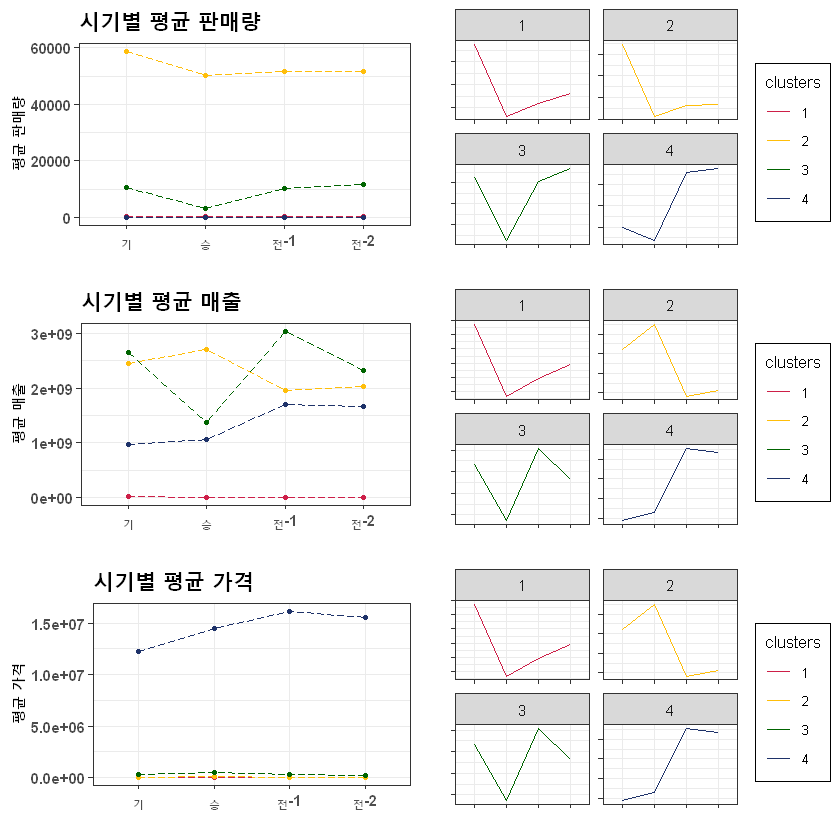

In [31]:
final_test_k = data_period %>% 
  left_join(data_clust) %>% 
  group_by(period, cluster) %>% 
  summarise(mean_amount = mean(selng_cascnt),
            mean_selling = mean(salamt),
            once_price = sum(salamt)/sum(selng_cascnt)
            ) %>% ungroup() %>% 
  select(c(period, cluster, mean_amount, mean_selling,once_price))

p1 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_amount,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3,linetype="longdash")+geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),
    legend.position = "none",
    text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 판매량",x="",title="시기별 평균 판매량")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))

p1_2 <-  final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_amount,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 판매량",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")

p2 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3,linetype="longdash")+geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),legend.position = "none",text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 매출",x="",title="시기별 평균 매출")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))

p2_2<-final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),
    legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 매출",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")
p3 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = once_price,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3,linetype="longdash")+geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),legend.position = "none",text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 가격",x="",title="시기별 평균 가격")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))


p3_2<-final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),
    legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)
    ) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 가격",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")
gridExtra::grid.arrange(p1,p1_2,p2,p2_2,p3,p3_2, ncol = 2, nrow = 3)

In [32]:
data_period %>% left_join(data_clust) %>% filter(cluster == 1) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"


[,1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [33]:
data_period %>% left_join(data_clust) %>% filter(cluster == 2) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"


"인터넷P/G, 택 시"


In [34]:
data_period %>% left_join(data_clust) %>% filter(cluster == 3) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"


"조세서비스(특약), 이동통신요금"


In [35]:
data_period %>% left_join(data_clust) %>% filter(cluster == 4) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"


"농축수산가공품, 국산 신차"


마지막으로, 각 클러스터에 묶인 품목의 특징들을 요약하면 다음과 같습니다.

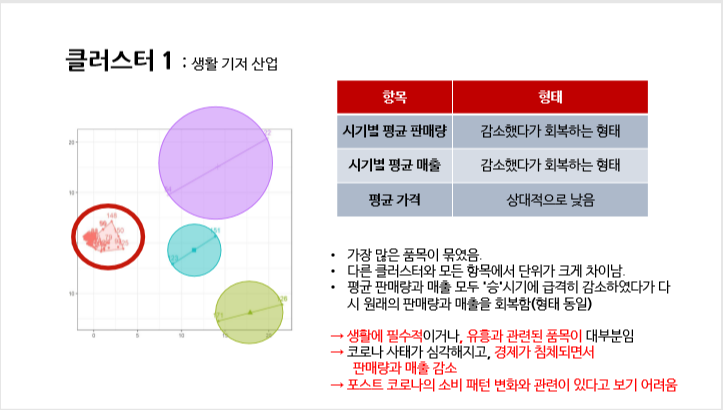

In [4]:
##클러스터1##
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터1.png")  

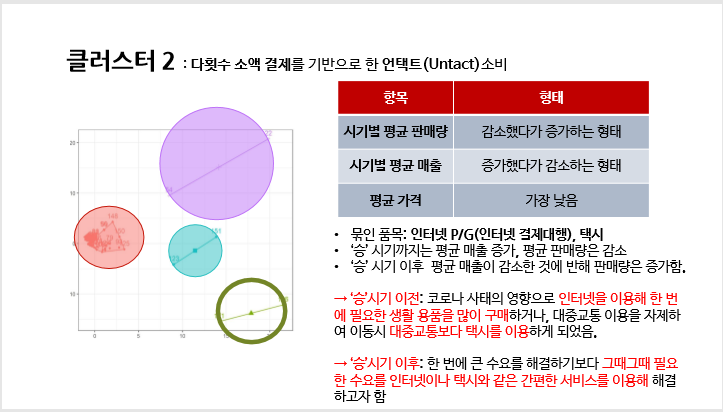

In [5]:
##클러스터2##
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터2.png")

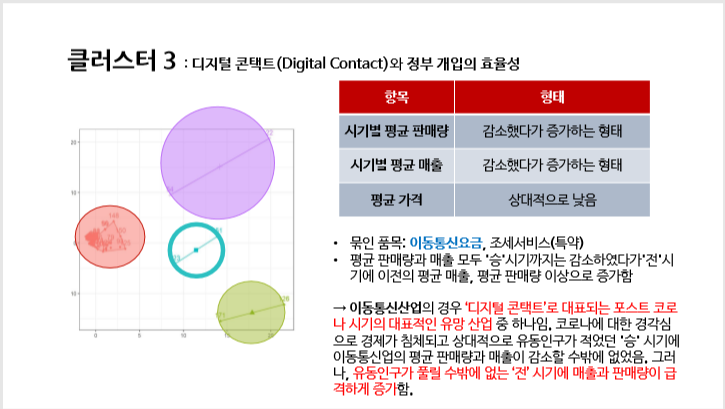

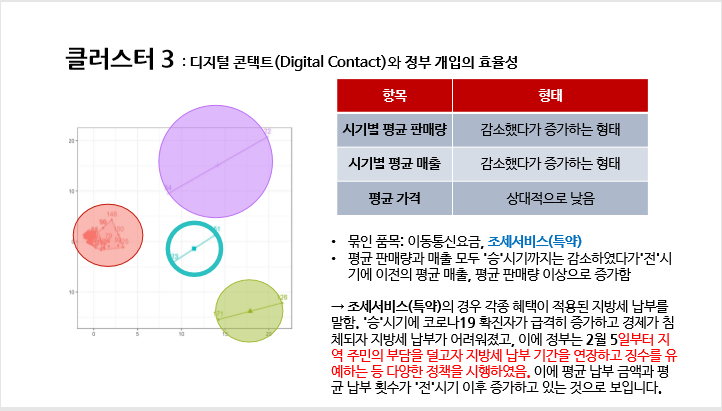

In [6]:
##클러스터3##
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터3.png",width=700,height=350)
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터3_2.png",width=700,height=350) 

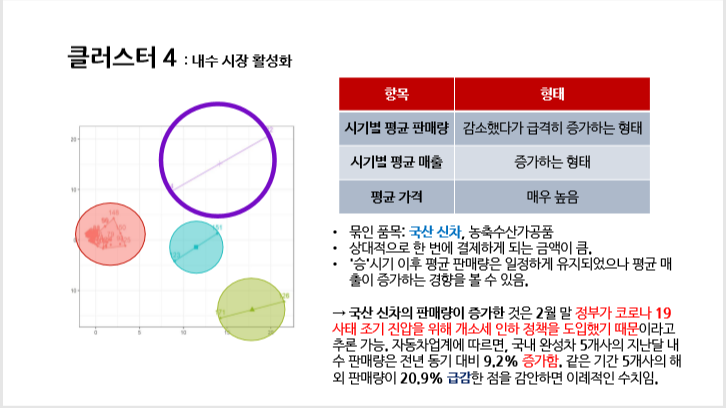

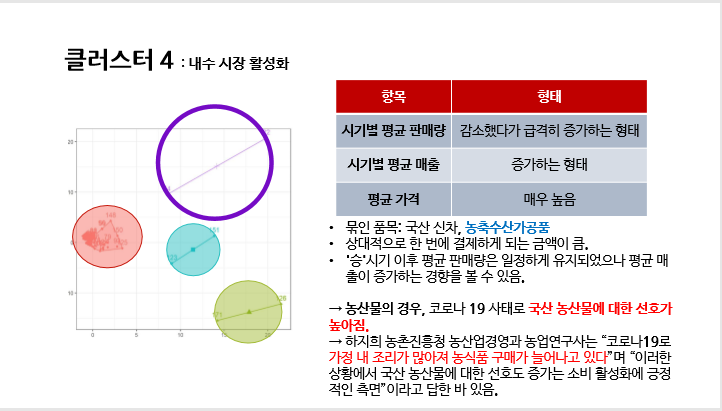

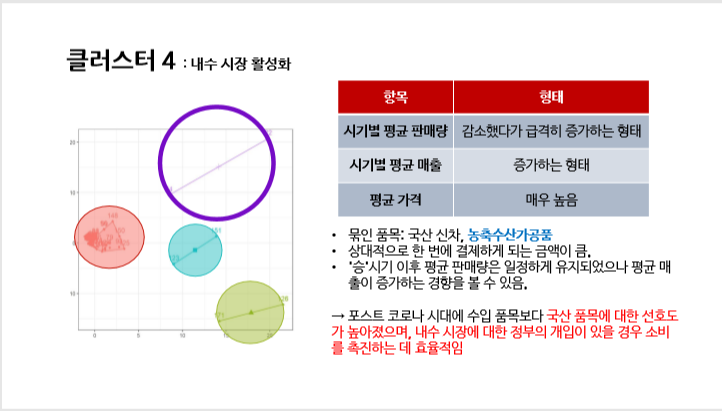

In [7]:
##클러스터4##
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터4.png",width=700,height=350)
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터4_1.png",width=700,height=350)
display_png(file="C:/Users/qtuej/Desktop/피샛/공모전/KT_data_20200703/2차본/클러스터4_2.png",width=700,height=350) 

##  C. Card data로 유망 산업 살펴보기_시계열 Factor Analysis 시각화

In [36]:
######################
## CARD DATA 전처리 ##
######################

rm(list = ls())
card <- fread('card.csv',
              header = TRUE, 
              stringsAsFactors = FALSE,
              data.table = FALSE,
              encoding = 'UTF-8'
             )

card <- card %>% 
        filter(! (selng_cascnt %in% grep('[ㄱ-힣]',unique(card$selng_cascnt), value = T)),
               ! (salamt %in% grep('[ㄱ-힣]',unique(card$salamt), value = T))) %>% 
        mutate(selng_cascnt = as.numeric(selng_cascnt),
               salamt = as.numeric(salamt),
               receipt_dttm = ymd(receipt_dttm)) %>% 
        select(-c(adstrd_code, mrhst_induty_cl_code))

card$selng_cascnt = ifelse(card$selng_cascnt < 0, 0, card$selng_cascnt)
card$salamt = ifelse(card$salamt < 0, 0, card$salamt)

### a. CARD 품목별 NA(결제 안된 일수) 확인__

In [ ]:
#########################################
## CARD 품목별 NA(결제 안된 일수) 확인 ##
#########################################

card_amount = card %>%  
  group_by(receipt_dttm, mrhst_induty_cl_nm) %>% 
  summarize(mean_amount = mean(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(key = mrhst_induty_cl_nm, value = mean_amount) 

data_missing = card_amount[,-1] %>% is.na() %>% colSums() %>% as_tibble()
data_missing = cbind(colnames(card_amount)[-1], data_missing)
colnames(data_missing) = c('name', 'num_missing')

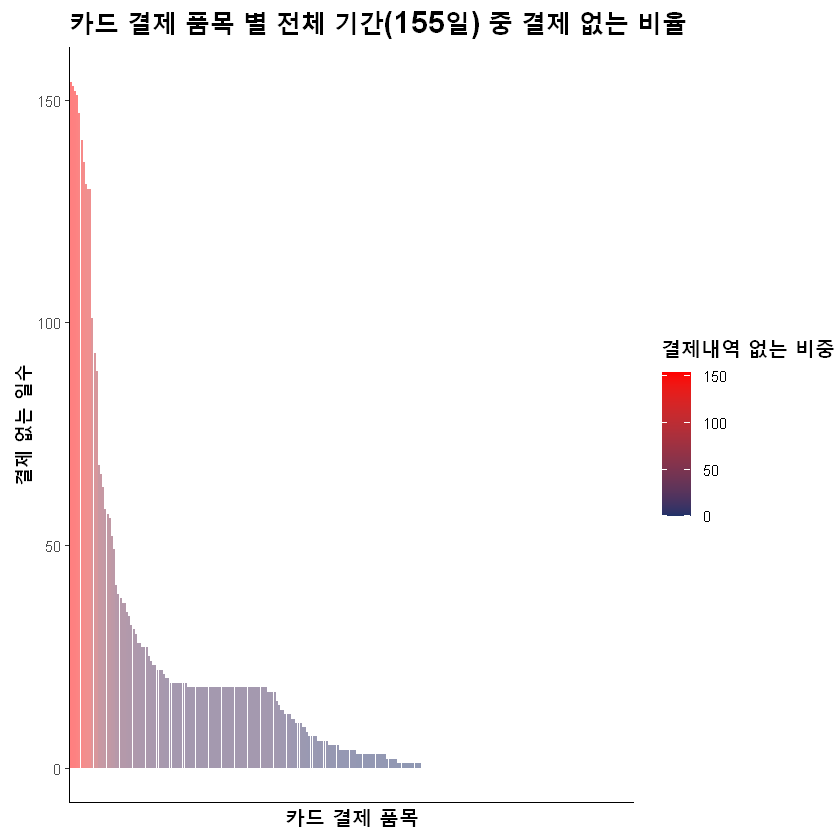

In [38]:
data_missing %>% 
  ggplot(aes(x = reorder(name, -num_missing), y = num_missing)) +
  geom_col(aes(fill = num_missing), alpha = 0.5) +
  scale_fill_gradient('결제내역 없는 비중', low = "#1E3269", high = "red") +
      scale_x_discrete(breaks = NULL) +
      labs(x = '카드 결제 품목', y = '결제 없는 일수') +
      ggtitle('카드 결제 품목 별 전체 기간(155일) 중 결제 없는 비율') +
      theme_classic() +
      theme(title = element_text(size = 15, face = 'bold'))

- __시계열 FA__ 를 시작하기 앞서, 분석에 Noise가 될 수 있는 품목들을 추려 보았습니다
- __전체 155일 기간중 NA가 큰 품목은 155일 중 결제 기록이 상당 부분 없다__ 는 것을 의미합니다.
- 이에 저희는 적합한 분석을 위해 NA가 많은 품목들은 제외하고 시계열 FA를 진행했습니다.

- _사실상 NA는 0으로 간주하는 것이 타당할 수 있으나, 시계열 FA의 경우 0이 많은 품목들은 Noise로 작용해 분석이 올바르게 진행되지 않을 수 있고 전체 기간 중 결제 기록이 많이 없는 품목은 유망 품목이라 보기 어려우므로 제거하고 진행했습니다._

### b. CARD 품목별 Time Series Plot

In [39]:
## NA 비중 큰 품목 제거 및 시계열 데이터 화 ##
card_amount = card_amount[colSums(is.na(card_amount)) < 10]
card_amount[is.na(card_amount)] <- 0
card_day <- card_amount[,-1] %>% ts(freq = 365.25)

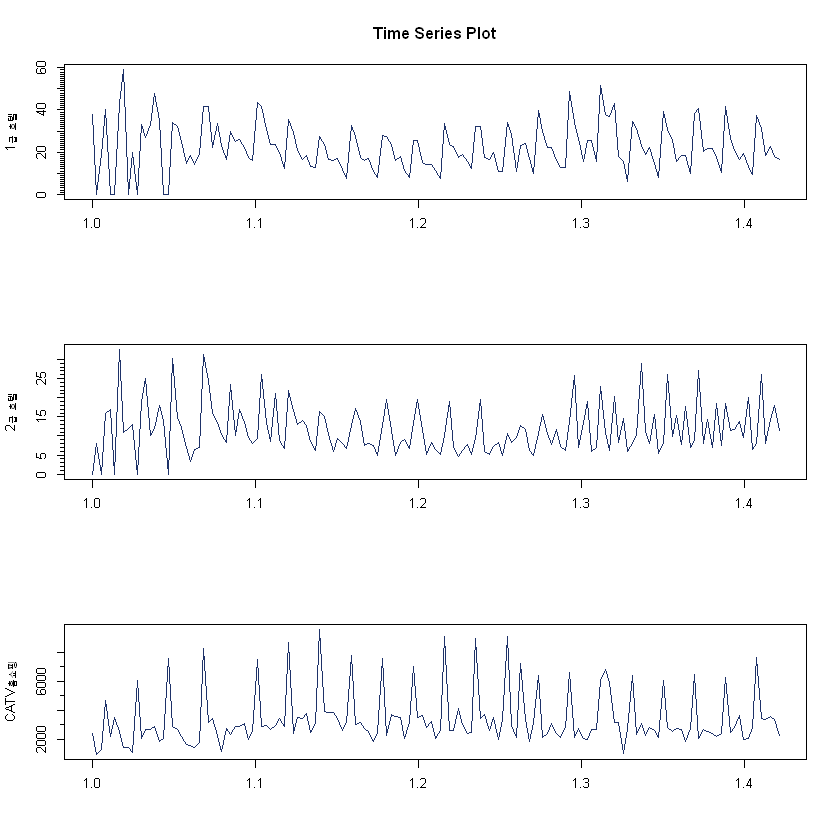

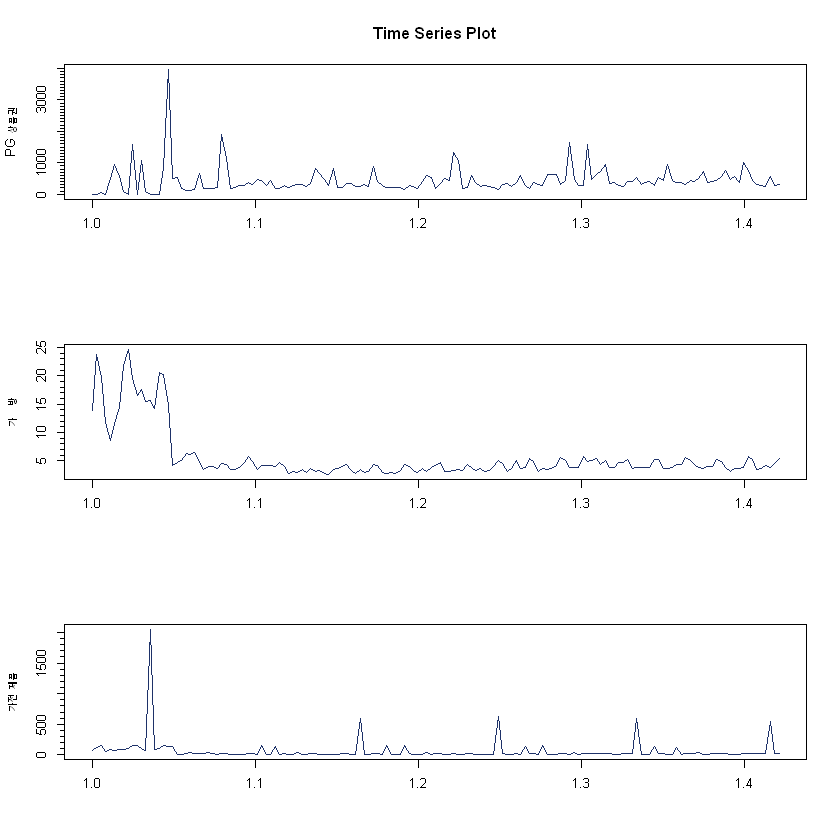

In [40]:
## Time Series Plot 확인 ##
par(mfrow = c(1,2))
tfplot(card_day[,1:3], graphs.per.page = 3, Title = "Time Series Plot",col = c("#1E3269"))
tfplot(card_day[,4:6], graphs.per.page = 3, Title = "Time Series Plot",col = c("#1E3269"))

### c. Eigen value를 통한 Factor 개수 결정

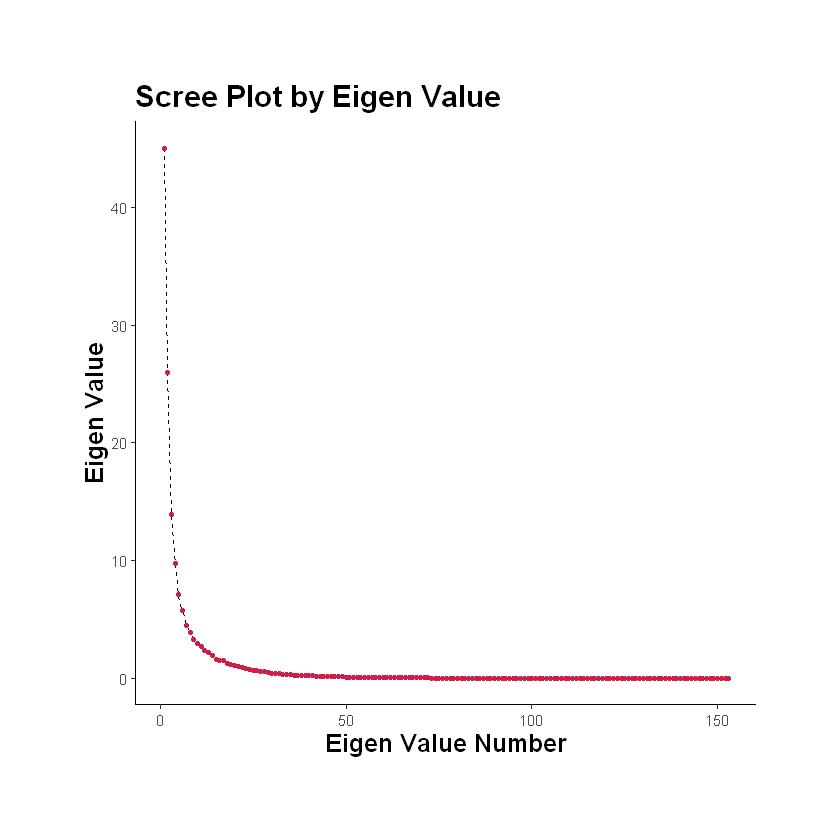

In [41]:
## Eigen value를 통한 Factor 개수 결정 ## 
DX <- diff(card_day, lag = 1)
xx <- eigen(cor(diff(card_day, lag = 1)), symmetric = TRUE)[["values"]]
data.frame('eigen_value' = xx, 'index' = 1:153) %>% 
  ggplot(aes(x = index, y = xx)) + 
  geom_line(linetype = 'dashed', color = 'black', size = 0.5) +
  geom_point(col = '#CD1F48', size = 1.2) + 
  labs(x = 'Eigen Value Number', y = 'Eigen Value') +
  ggtitle('Scree Plot by Eigen Value') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin = margin(50,50,50,50))

- __Factor의 개수를 정하기 위해__ 각 품목별 __Eigen Value__ 값들을 확인햇습니다.
- 저희는 9개의 Factor를 사용하기로 결정했습니다.

### d. 시계열 Factor Analysis(요인분석) 시각화

In [ ]:
card_fa <- estTSF.ML(card_day, 9, rotation = "quartimin", normalize =  TRUE)

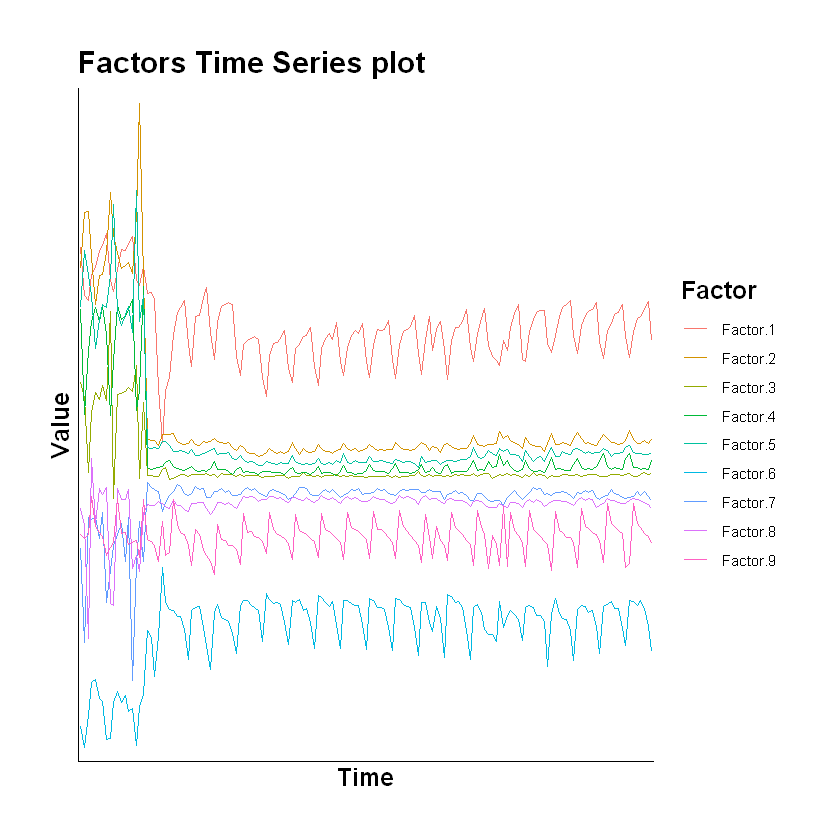

In [43]:
data.frame(factors(card_fa), 'time' = 1:155) %>% 
  gather(key = 'Factor', value = 'value', -time) %>% 
  ggplot(aes(x = time, y = value, color = Factor)) + 
  geom_line() +
  labs(x = 'Time', y = 'Value') +
  ggtitle('Factors Time Series plot') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin =margin(30,30,30,30)) +
  scale_x_discrete(breaks = NULL) +
  scale_y_discrete(breaks = NULL)


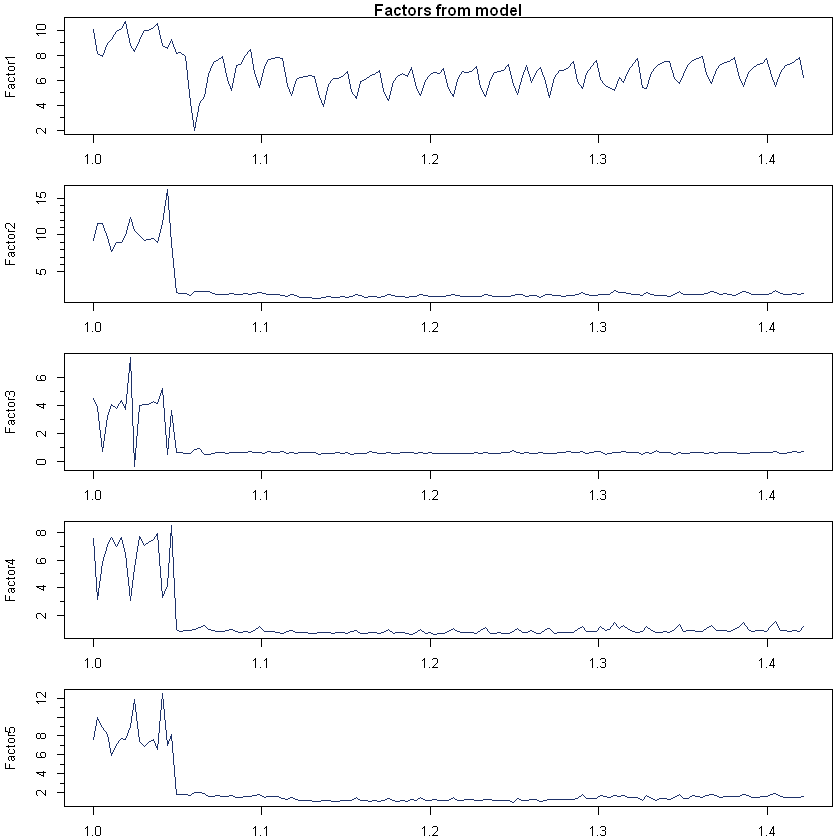

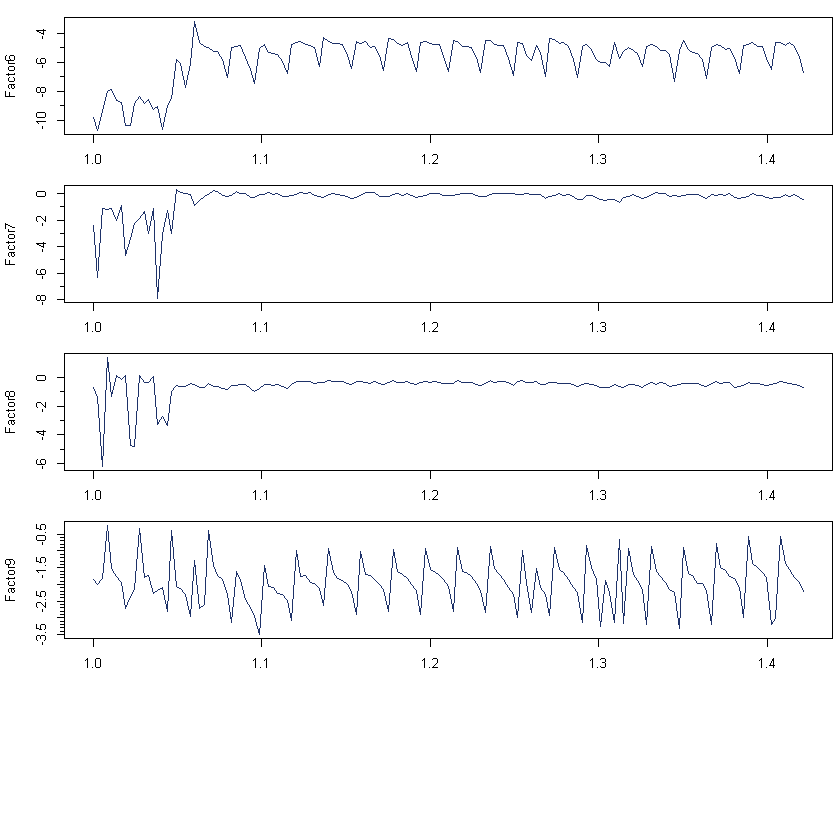

In [44]:
tfplot(factors(card_fa),
       Title = "Factors from model", lty = c("solid"), col = c("#1E3269"),
       xlab = c(""), ylab = c("Factor1", "Factor2", "Factor3", "Factor4",
                              "Factor5", "Factor6", "Factor7", "Factor8", "Factor9"),
       par = list(mar = c(2.1, 4.1, 1.1, 0.5)), reset.screen = TRUE)

- __시계열 FA__ 를 통해 공통된 9개의 잠재적인 시계열 요인들을 추출해 냈습니다.
- 저희는 9개의 잠재적 요인 중 __증가하는 추세를 가진 Factor6과 Factor7__ 를 좀 더 면밀히 살펴봤습니다.

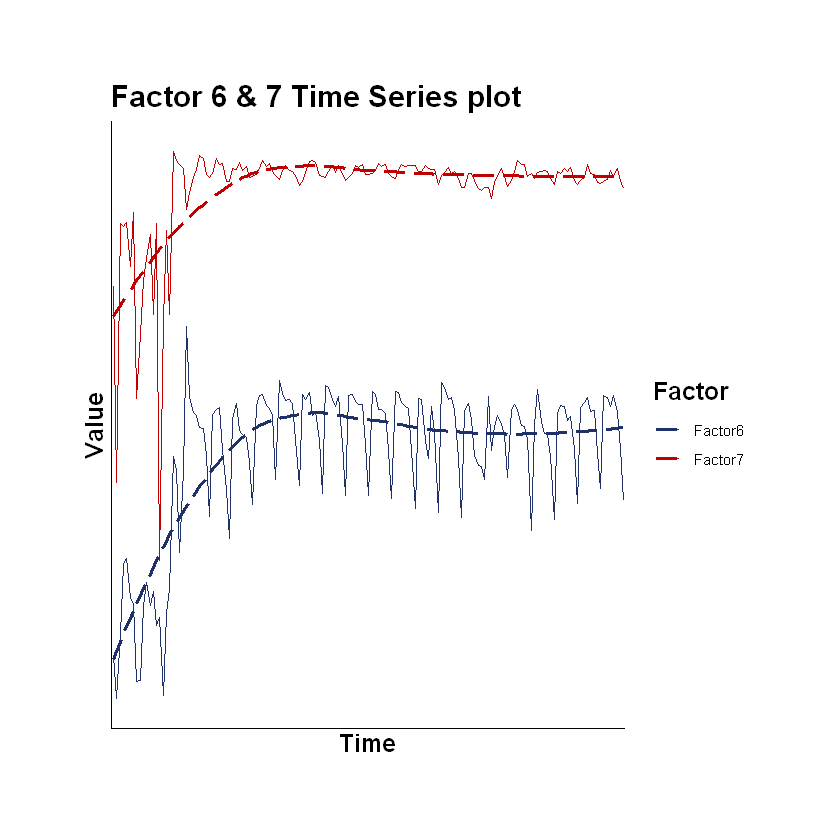

In [45]:
data.frame(factors(card_fa), 'time' = 1:155) %>% 
  gather(key = 'Factor', value = 'value', -time) %>% 
  filter(Factor %in% c('Factor.6', 'Factor.7')) %>% 
  ggplot(aes(x = time, y = value, color = Factor)) + 
  geom_line() +
  geom_smooth(method = 'loess', formula = y~x, se = FALSE, linetype = 'longdash') +
  labs(x = 'Time', y = 'Value') +
  ggtitle('Factor 6 & 7 Time Series plot') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin = margin(50,50,50,50)) +
  scale_x_discrete(breaks = NULL) +
  scale_y_discrete(breaks = NULL)+scale_color_manual(values=c( "#1E3269","#c00000"),labels =c('Factor6', 'Factor7'))

- __Factor 6와 7__ 은 확실히 __증가하는 추세__ 를 확인할 수 있습니다.
- __Loading Matrix 값을 통해 어떤 품목이 해당 Factor들에 큰 영향을 끼쳤는지__ 확인 해보겠습니다.

### e. Factor6 & Factor7에 영향을 끼친 품목들 시각화

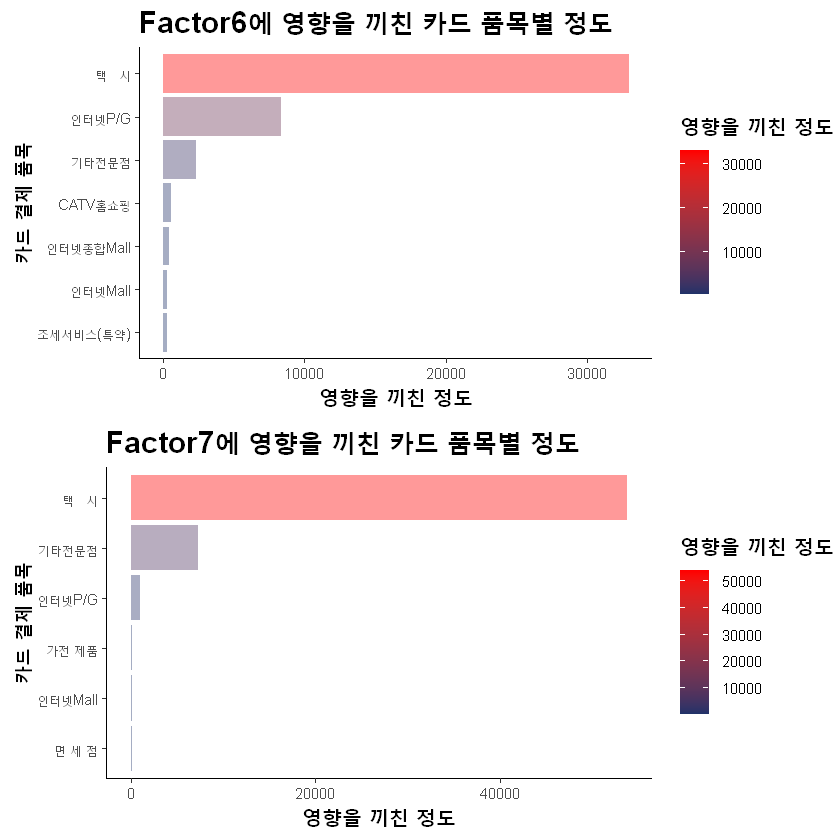

In [46]:
factor_6 = card_fa$loadings[,6][which(card_fa$loadings[,6] > 100)] %>% data.frame()
factor_6 = data.frame('name' = row.names(factor_6), 'value' = factor_6[,1])
p1 <- factor_6 %>% 
  ggplot(aes(x = reorder(name, value), y = value)) +
  geom_col(aes(fill = value), alpha = 0.4,) +
  scale_fill_gradient('영향을 끼친 정도', low = "#1E3269", high = "red") +
  labs(x = '카드 결제 품목', y = '영향을 끼친 정도') +
  ggtitle('Factor6에 영향을 끼친 카드 품목별 정도') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold')) +
  coord_flip() 


factor_7 = card_fa$loadings[,7][which(card_fa$loadings[,7] > 100)] %>% data.frame()
factor_7 = data.frame('name' = row.names(factor_7), 'value' = factor_7[,1])
p2 <- factor_7 %>% 
  ggplot(aes(x = reorder(name, value), y = value)) +
  geom_col(aes(fill = value), alpha = 0.4,) +  
  scale_fill_gradient('영향을 끼친 정도', low = "#1E3269", high = "red") +
  labs(x = '카드 결제 품목', y = '영향을 끼친 정도') +
  ggtitle('Factor7에 영향을 끼친 카드 품목별 정도') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold')) +
  coord_flip() 

grid.arrange(p1, p2, ncol = 1)

- __Factor 6__ 에서는 __택시, 인터넷 관련 품목, CATV 홈쇼핑__ 등 __'Untact'__ 시대를 대변해주는 품목을 확인 할 수 있습니다.
- __Factor 7__ 에서도 역시 __택시, 인터넷 관련 품목__ 등을 확인할 수 있습니다.
- __Factor 7__ 에서 __가전제품 품목__ 은 사람들의 외출이 적어지면서 인테리어에 조금 관심을 가지게 되었다고 유추 할 수 있습니다.
- 결론적으로 __코로나가 심각해짐에 따라 사람과의 대면이 적은 결제 품목(ex. 택시, 인터넷 관련 품목)들은 매출이 증가했다__ 고 볼 수 있겠습니다.

- _기타전문점의 경우 BC카드에서 해당 업종 코드 확인 결과, 기타 품목에 해당하는 것을 확인할 수 있었습니다. 기타라는 범주가 포괄적이라 나타난 결과라고 생각합니다._

## 3. 결론
##  A. 인사이트 정리

지금까지 본 조사는 FA와 K-Means 클러스터링, 시계열 FA등 여러 방법론을 통해 포스트 코로나 시대의 소비 패턴과 유망 품목들에 대해 알아보았습니다. 이를 통해 얻은 인사이트는 다음과 같이 요약됩니다.


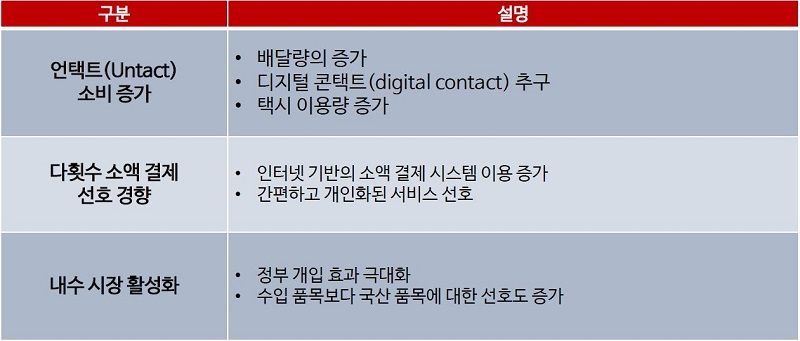

In [47]:
display_png(file="insight.JPG")

  &nbsp;&nbsp;첫째로, __'언택트(Untact)'__ 한 소비 경향성입니다. 이는 앞서 정의한 코로나 사태의 시작인 '기' 시기부터 두드러지게 나타나는 특성입니다. '언택트'란 직역하면 '접촉하지 않은' 이라는 뜻으로, 이는 전염성이 강력한 코로나바이러스의 특성상 생활의 모든 부분에서 다수와의 접촉을 꺼리게 된 대중의 행동 패턴을 시사합니다. <br><br>
   &nbsp;우선, 코로나 사태 이후 __배달을 선호하는 경향__ 이 짙게 드러났습니다. 본론 A에서 살펴보았듯, 코로나 확진자 수가 상대적으로 적었던 지역에 비해 코로나 심각지역(서울, 경기도, 경상북도, 대구)에서 배달 건수의 증가 추세가 눈에 띄게 가파른 것을 볼 수 있었고, 양쪽 모두 기-승-전 의 시기를 거차면서 증가하는 추세를 보였습니다.<br><br>
   &nbsp;다음으로, __디지털 콘택트(digital contact)__ 를 추구하는 경향이 짙게 드러났습니다. '디지털 콘택트(digital contact)'는 '언택트(Untact)' 경향의 일종으로, 직접적인 접촉을 피하고 디지털 통신을 이용하여 타인과 접촉하고 생활의 여러 문제를 해결하려는 경향성을 말합니다. 앞서 본론 B에서, 품목 별 소비지수(index)데이터를 FA하여 화장품,건강관리용품,애완동물용품 카테고리의 cgi 변화 추이와 40대의 소비 변화율 추이가 비슷한 특성을 가지고 있다는 인사이트를 얻었습니다. 특히 화장품 산업의 경우 최근 오프라인 매장이 감소하고 온라인 매장이 증가하는 추이를 보이고 있습니다. 화장품 산업은 앞서 정의한 코로나 시기의 '승'단계에서 면세점 수익의 감소로 매출이 크게 떨어지는 경향성을 보였으나, '전'시기 이후로 빠르게 회복하는 모습을 보이고 있습니다. 온라인 매장 수가 급격히 증가하고 있다는 점과, '디지털 콘택트(digital contact)'라는 포스트 코로나 시대의 대표적인 소비 트렌드를 고려했을 때, __온라인 시스템을 기반으로 한 화장품 산업__ 은 더욱 성장할 전망입니다. <br><br>
     &nbsp;디지털 콘택트(digital contact)를 추구하는 경향은 업종 별 결제금액 데이터(card)에서도 드러났습니다. 앞서 k-means 클러스터링 기법을 통해 데이터의 군집을 4개의 클러스터로 분류하였습니다. 특히 클러스터 1과 4에서, __인터넷 결제 시스템__ 과 __이동통신 산업__ 의 경우 포스트 코로나 시기의 유망 산업으로 볼 수 있었는데, 이는 모두 디지털 콘택트(digital contact)를 추구하는 대중의 행동양식을 대변합니다. 또한, 시계열 FA를 통해 잠재요인을 분석한 결과도 마찬가지로 __인터넷 기반의 범주들(인터넷 P/G,인터넷 Mall)__ 과 역시 디지털 통신을 기반으로 하는 __'CATV홈쇼핑'__ 범주가 증가 추세에 큰 영향을 끼친 것으로 보아 디지털 통신 기반의 산업들이 유망할 것으로 예상됩니다.<br><br>
     &nbsp;언택트(Untact)소비 트렌드에서 또 눈여겨볼만한 것은 __택시 산업의 성장__ 입니다. 업종 별 결제금액 데이터를 클러스터링했을 때, 클러스터4에서 택시 산업이 '승'시기에 평균 매출이 급격히 증가하고, 포스트 코로나로 정의될 수 있는 '전' 시기 이후에 평균 매출은 떨어졌으나 일정한 평균 판매량을 유지하고 있는 것으로 보아, 대중교통을 이용하던 사람들이 다수와의 접촉이 적은 택시를 더 많이 이용하게 되었음을 추론할 수 있습니다. 특히, 시계열 FA결과 증가 추세에 가장 큰 영향을 미친 것이 택시 산업이었습니다. 이를 통해, '언택트(Untact)'키워드로 대표되는 포스트 코로나 시대에 택시와 같은 이동 서비스뿐 아니라 다수와의 접촉을 최소화하는 __'개인화' 된 서비스가 유망할 것임__ 을 추론할 수 있습니다.  

 &nbsp;둘째로, 포스트 코로나 시대의 대중은 __'다횟수 소액결제'__ 를 선호하는 경향을 보입니다. 업종 별 결제금액 데이터 클러스터링 결과에서, 클러스터 4에 묶인 '인터넷 P/G'와 '택시'의 특징은 한 번에 결제하는 금액이 크지 않고, 평균 매출이 '전'시기 이후 상대적으로 떨어졌음에도 평균 판매량은 유지하고 있다는 점이었습니다. 이를 통해, 포스트 코로나 시대의 대중은 한 번에 큰 수요를 해결하기보다 그때그때 필요한 수요를 인터넷이나 택시와 같은 간편한 서비스를 이용해 해결하고자 함을 알 수 있었습니다.<br><br>
 &nbsp;마지막으로, 코로나 19 사태로 __내수 시장이 활성화__ 되었음을 엿볼 수 있었습니다. 이러한 경향성은 업종 별 결제금액 데이터 클러스터링 결과, 클러스터 2에 묶인 품목들에서 두드러지게 드러납니다. 우선, 정부가 소비 시장에 개입하여 경제를 활성화하고자 할 경우 그 효과가 이전보다 상대적으로 극대화된다는 점이 인상적입니다. 클러스터 2의 __'국산 신차'__ 품목이 그 예시입니다. 코로나 19 사태 조기 극복을 위해 정부가 개소세 인하 정책을 추진하자, 국산 신차의 평균 매출이 증가하였습니다. 이는 코로나 19 사태의 조기 극복을 위해 내수 시장을 활성화해야 한다는 인식이 정부뿐 아니라 국민에게 공통됨을 의미합니다. 또한, __농축수산가공품__ 의 평균 매출 역시 상승하였는데, 코로나 19사태로 소위 '집밥족'이 증가하면서 국산 농산물에 대한 선호도가 높아졌다고 추론할 수 있습니다.


##  B. 한계 및 시사점



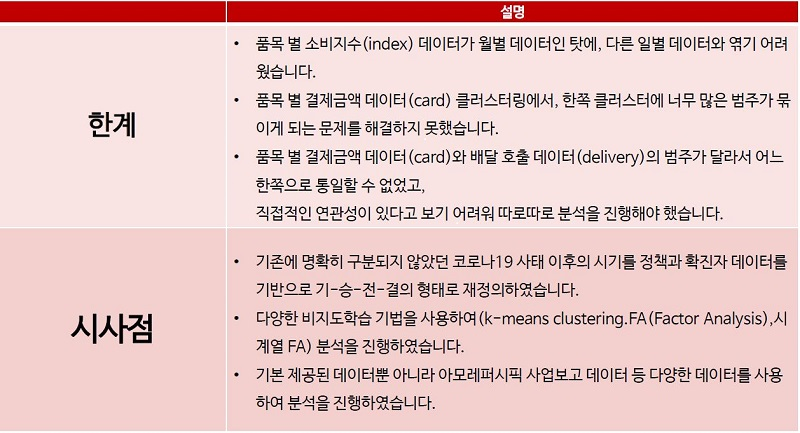

In [48]:
display_png(file="last.JPG")

##  C. 맺으며

 &nbsp;코로나19 사태 발발 이후 사회의 많은 부분들이 얼어붙었습니다. 확진자 수가 급격히 증가하던 '승'시기에 국가 경제의 대부분이 침체될 수밖에 없었던 것은 어쩌면 당연한 결과일지도 모릅니다. 현재 우리는 얼어붙은 것들이 서서히 풀리는 '전'시기의 한가운데에 있습니다. 권준옥 중앙방역대책본부 부본부장은 "코로나 19 발생 이전의 세상은 다시 오지 않는다" 며 일상 속에서 생활방역이 습관화되어야 한다고 강조한 바 있습니다. 물론, 앞으로 다가올 포스트 코로나의 모습이 여전히 '전'의 연속일지, 혹은 코로나의 종말, 즉 '결'이 다가올지는 명확하지 않습니다. 어떤 형태이든, 우리는 포스트 코로나 시대의 변화하는 소비패턴을 파악하고 이를 통해 더 나은 삶을 구축하기 위한 노력을 이어가야 할 것입니다.<br>
 
 ##### 지금까지 긴 글 읽어주셔서 감사합니다. 투표 부탁드립니다!